# Prescribed vegetation cover
Preliminary results showed generally an off-set between observed and modelled vegetation cover. Here, vegetation cover derived from remote sensing (Donohue et al. 2008) is used as input for the VOM, and compared to the VOM-results that optimize the vegetation cover.

## Timeseries of vegetation cover

In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

In [3]:
#read seasonal projective cover data used as input for the VOM
pc_howard = np.genfromtxt("../../work/additional_analyses/prescribed_cover/HowardSprings/input/perc_cov.txt")  #mm/d
pc_adelaide = np.genfromtxt("../../work/additional_analyses/prescribed_cover/AdelaideRiver/input/perc_cov.txt")  #mm/d
pc_litch = np.genfromtxt("../../work/additional_analyses/prescribed_cover/Litchfield/input/perc_cov.txt")  #mm/d
pc_daly = np.genfromtxt("../../work/additional_analyses/prescribed_cover/DalyUncleared/input/perc_cov.txt")  #mm/d
pc_dry = np.genfromtxt("../../work/additional_analyses/prescribed_cover/DryRiver/input/perc_cov.txt")  #mm/d
pc_sturt = np.genfromtxt("../../work/additional_analyses/prescribed_cover/SturtPlains/input/perc_cov.txt")  #mm/d

time = np.arange(datetime(int(pc_howard[0,3]),int(pc_howard[0,2]),int(pc_howard[0,1])), 
                  datetime(int(pc_howard[-1,3]),int(pc_howard[-1,2]),int(pc_howard[-1,1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


In [4]:
#read seasonal projective cover data used as input for the VOM
pc2_howard = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/HowardSprings/input/perc_cov.txt")  #mm/d
pc2_adelaide = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/AdelaideRiver/input/perc_cov.txt")  #mm/d
pc2_litch = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/Litchfield/input/perc_cov.txt")  #mm/d
pc2_daly = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/DalyUncleared/input/perc_cov.txt")  #mm/d
pc2_dry = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/DryRiver/input/perc_cov.txt")  #mm/d
pc2_sturt = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/SturtPlains/input/perc_cov.txt")  #mm/d

time2 = np.arange(datetime(int(pc2_howard[0,3]),int(pc2_howard[0,2]),int(pc2_howard[0,1])), 
                  datetime(int(pc2_howard[-1,3]),int(pc2_howard[-1,2]),int(pc2_howard[-1,1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


In [5]:
#read in fpar-data

fparv5_howard = np.loadtxt('../../data/fPAR/fpar_howard_v5.txt',delimiter=',', usecols=3 )
fparv5_adelaide = np.loadtxt('../../data/fPAR/fpar_adelaide_v5.txt',delimiter=',', usecols=3 )
fparv5_litch = np.loadtxt('../../data/fPAR/fpar_litchfield_v5.txt',delimiter=',', usecols=3 )
fparv5_daly = np.loadtxt('../../data/fPAR/fpar_daly_v5.txt',delimiter=',', usecols=3 )
fparv5_dry = np.loadtxt('../../data/fPAR/fpar_dry_v5.txt',delimiter=',', usecols=3 )
fparv5_sturt = np.loadtxt('../../data/fPAR/fpar_sturt_v5.txt',delimiter=',', usecols=3 )

fparv5_dates = np.genfromtxt('../../data/fPAR/dates_v5', dtype='str', delimiter=',')
fparv5_dates = pd.to_datetime(fparv5_dates[:,1], format="%Y%m")


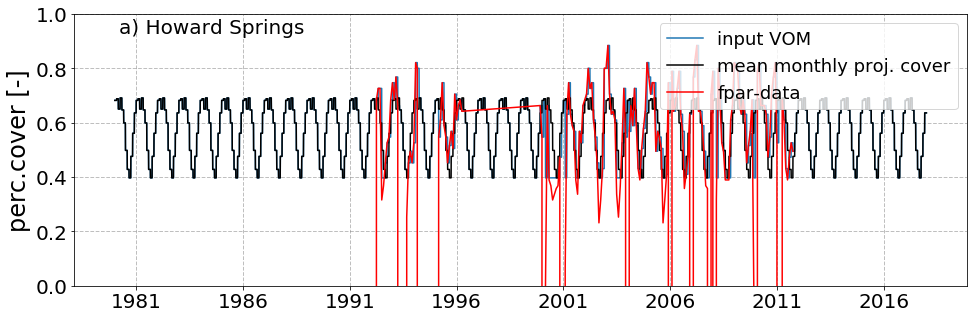

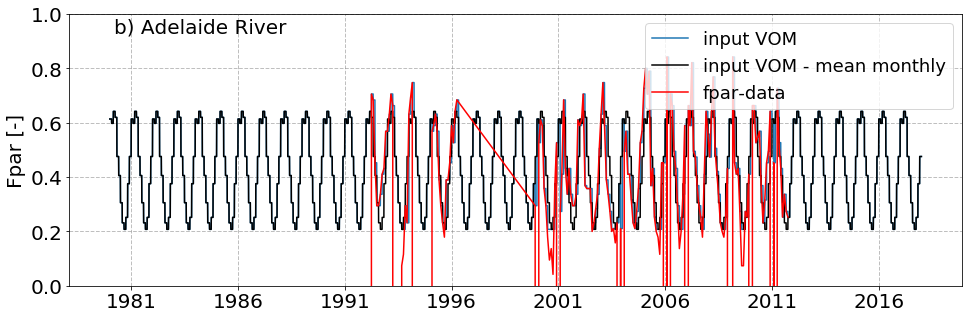

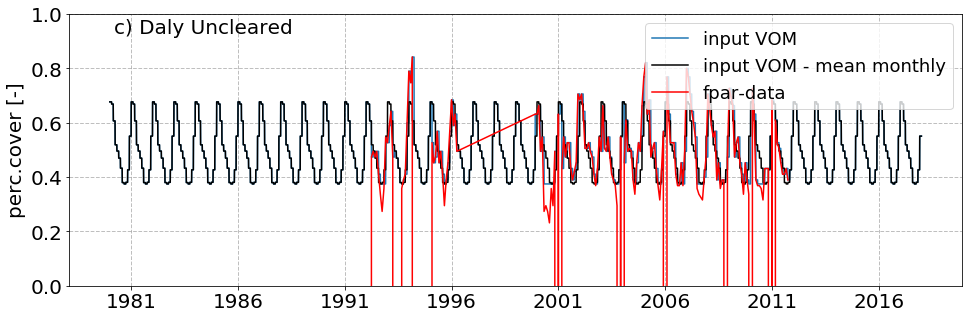

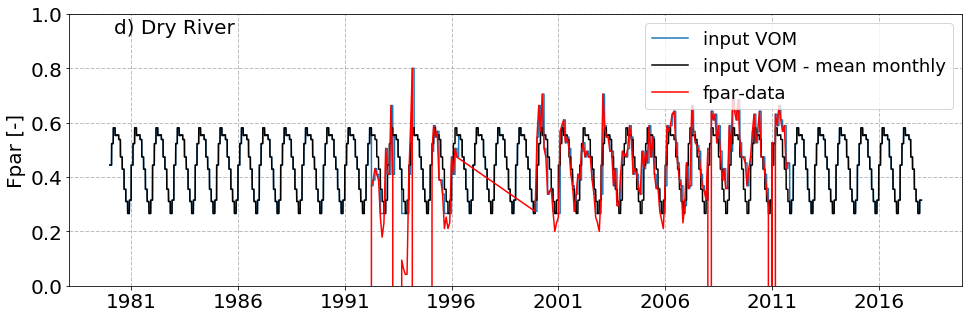

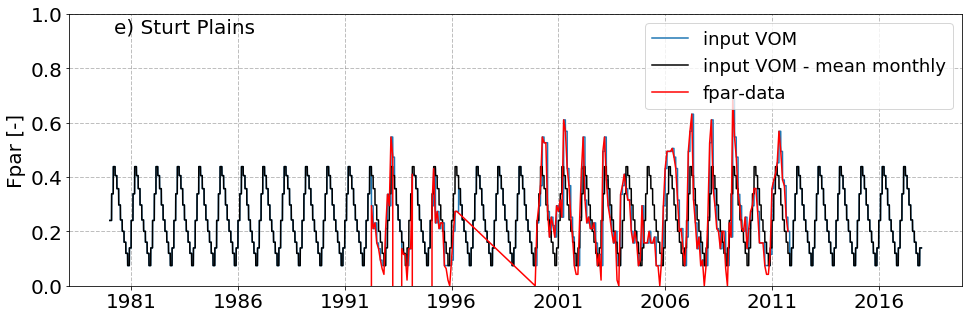

In [6]:

pc_t = [ 0.3971929824561404, 0.20771929824561405, 0.320,
        0.37473684210526315, 0.26616541353383455, 0.07443609022556391]


#howardsprings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))    
ax.plot(time, pc_howard[:,4] + pc_t[0], label = "input VOM")
ax.plot(time2, pc2_howard[:,4] + pc_t[0],color="black", label = "mean monthly proj. cover")
ax.plot(fparv5_dates, fparv5_howard/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=24)
#ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2006,1, 1), datetime( 2006 ,12, 31)]) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

    
ax.set_ylim([0,1])
ax.text(0.05, 0.95, "a) Howard Springs", ha='left', va='center', fontsize=20, transform=ax.transAxes)
plt.legend(fontsize=18,loc='upper right')

#Litchfield
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
#ax.plot(time, pc_litch[:,4]+ pc_t[2], label = "input VOM")
#ax.plot(time2, pc2_litch[:,4]+ pc_t[2],color="black", label = "mean monthly proj. cover")
#ax.plot(fparv5_dates, fparv5_litch, color="red", label="fpar-data")
#ax.set_ylabel("perc.cover [-]", fontsize=20)
#ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 
#ax.set_ylim([0,1])
#ax.text(0.05, 0.95, "b) Litchfield", ha='left', va='center', fontsize=20,transform=ax.transAxes)
#plt.legend()

#AdelaideRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_adelaide[:,4] + pc_t[1], label = "input VOM")
ax.plot(time2, pc2_adelaide[:,4] + pc_t[1],color="black", label = "input VOM - mean monthly")
ax.plot(fparv5_dates, fparv5_adelaide/0.95, color="red", label="fpar-data")
#ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
ax.text(0.05, 0.95, "b) Adelaide River", ha='left', va='center', fontsize=20,transform=ax.transAxes)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18, loc='upper right')


#DalyUncleared
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_daly[:,4] + pc_t[3], label = "input VOM")
ax.plot(time2, pc2_daly[:,4] + pc_t[3], color="black", label = "input VOM - mean monthly")
ax.plot(fparv5_dates, fparv5_daly/0.95, color="red", label="fpar-data")
ax.set_ylabel("perc.cover [-]", fontsize=20)
#ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
#ax.set_xlim([datetime(2007,1, 1), datetime( 2011 ,12, 31)]) 
ax.text(0.05, 0.95, "c) Daly Uncleared", ha='left', va='center', fontsize=20, transform=ax.transAxes)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18,loc='upper right')

#DryRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_dry[:,4] + pc_t[4], label = "input VOM")
ax.plot(time2, pc2_dry[:,4] + pc_t[4], color="black", label = "input VOM - mean monthly")
ax.plot(fparv5_dates, fparv5_dry/0.95, color="red", label="fpar-data")
#ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
#ax.set_xlim([datetime(2002,1, 1), datetime( 2006 ,12, 31)]) 
ax.text(0.05, 0.95, "d) Dry River", ha='left', va='center', fontsize=20,transform=ax.transAxes)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18, loc='upper right')

#SturtPlains
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(time, pc_sturt[:,4] + pc_t[5], label = "input VOM")
ax.plot(time, pc2_sturt[:,4] + pc_t[5],  color="black", label = "input VOM - mean monthly")
ax.plot(fparv5_dates, fparv5_sturt/0.95, color="red", label="fpar-data")
#ax.set_ylabel("perc.cover [-]", fontsize=20)
ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
ax.text(0.05, 0.95, "e) Sturt Plains", ha='left', va='center', fontsize=20,transform=ax.transAxes)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18, loc='upper right')
plt.show()


**Figure S4.1.** Constructed timeseries of vegetation cover used as input for the VOM with the actual values supplemented by the mean monthly values (blue), and just the mean monthly values (black),  which are based on the monthly mean values of fPar-based vegetation cover (Donohue et al., 2008) for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains. Observed fPar-based vegetation cover is shown in red. 

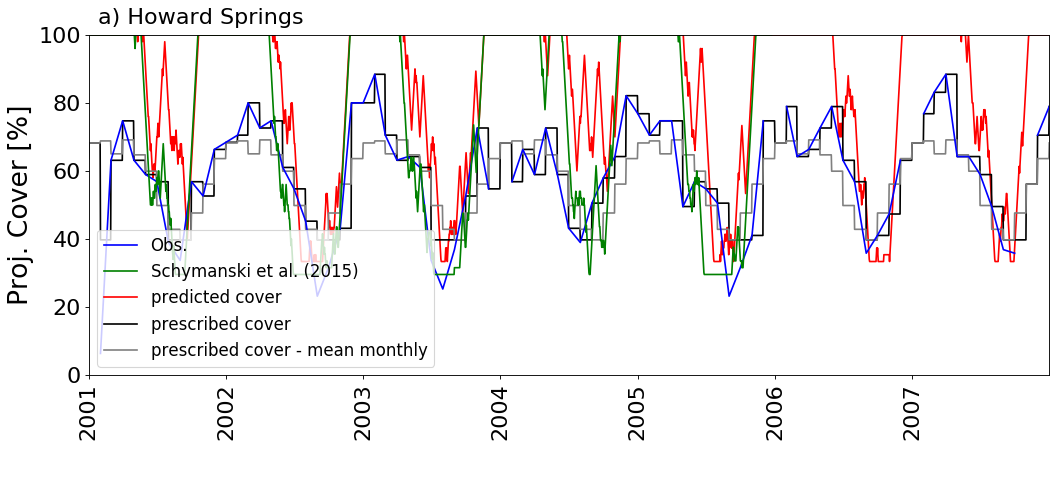

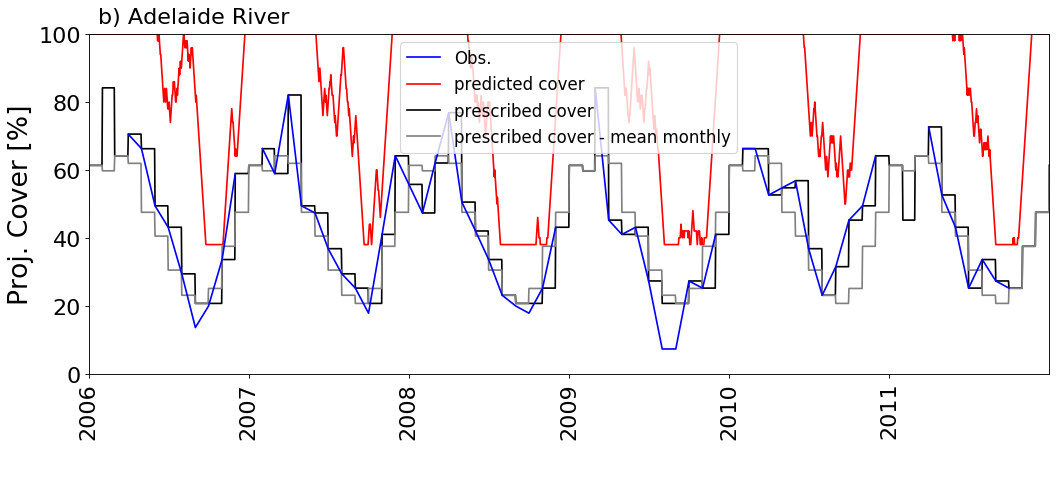

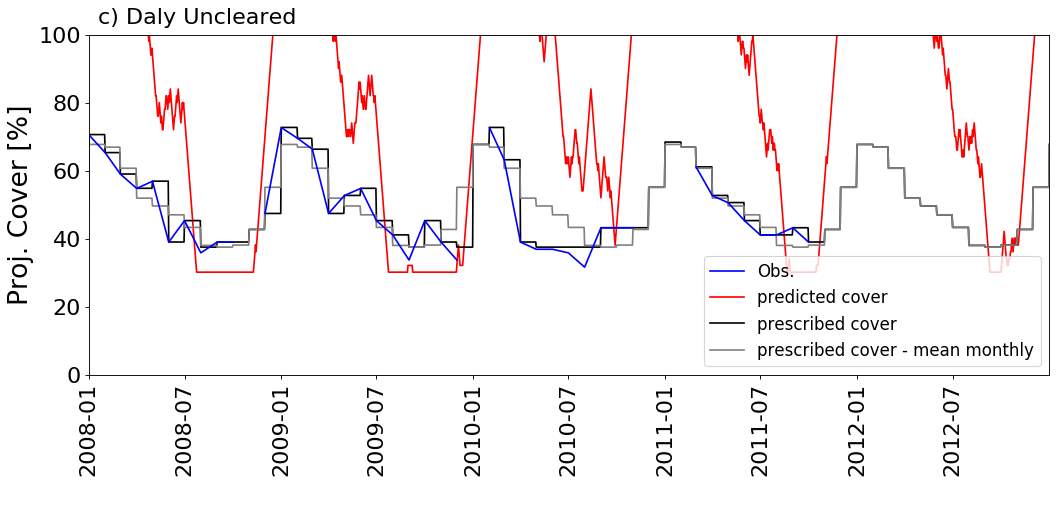

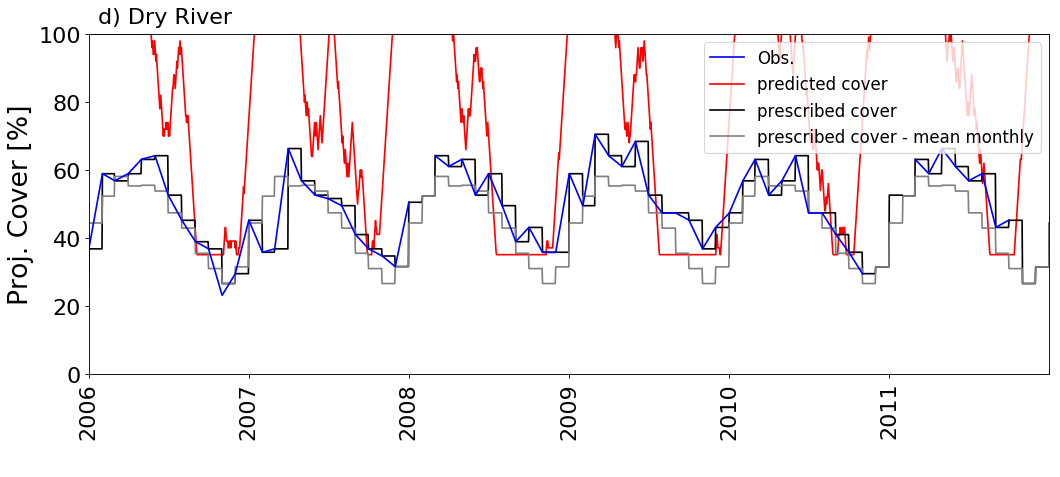

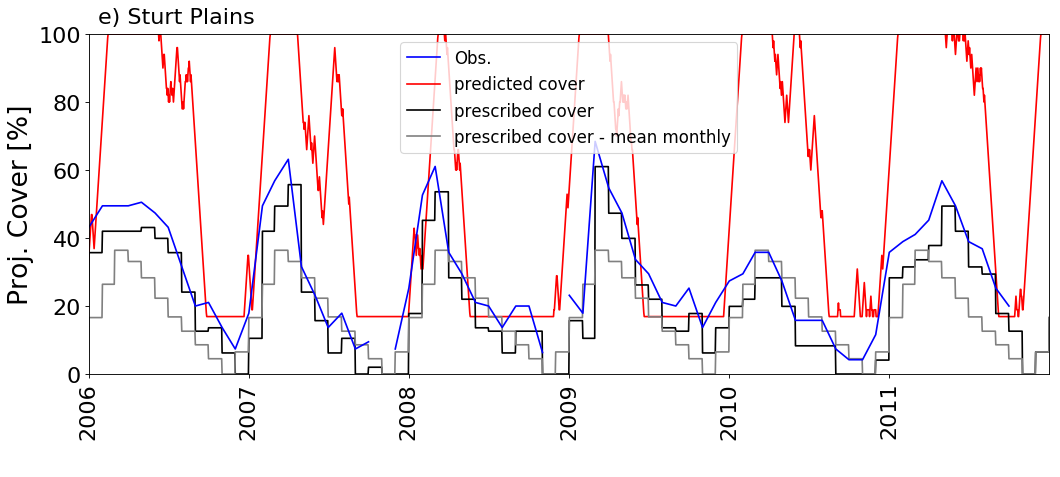

In [7]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v pc -ys 2001 -ye 2007 --var2015 pc -ys 2001 -ye 2007 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 --colors red black gray \
--title "a) Howard Springs" --legend True \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" 

#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 --colors red black gray \
--title "b) Adelaide River" --legend True \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" 
#Litchfield
#%run ../../src_py/plot_vegetation.py  \
#-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
#../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
#../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
#-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
#--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
#--ylabel "Proj. Cover [%]" --mf 100 --colors red black green\\
#--title "c) Litchfield" --legend True  \
#--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v asstot -ys 2008 -ye 2012 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2008 -ye 2012 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 --colors red black gray \
--title "c) Daly Uncleared" --legend True  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" 

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 --colors red black gray \
--title "d) Dry River" --legend True  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" 
#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 --colors red black gray\
--title "e) Sturt Plains" --legend True --cbar_max 3.0  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" 

**Figure S4.2.** Timeseries of vegetation cover as a result of the VOM (red), prescribed values are shown in black, prescribed values consisting of the mean monthly values in gray, fPar-based vegetation cover (Donohue et al., 2008) is shown in red, for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains.


## Timeseries of evaporation

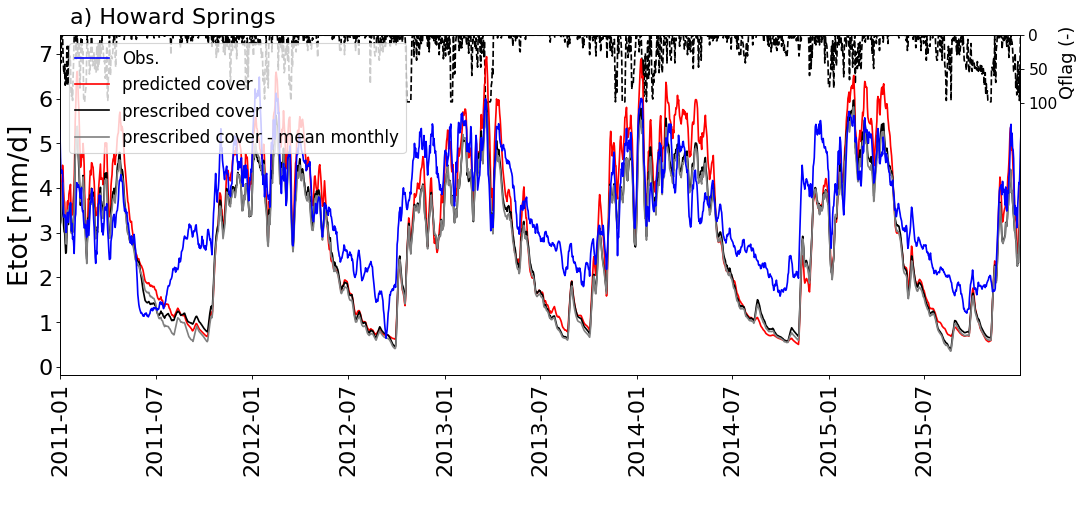

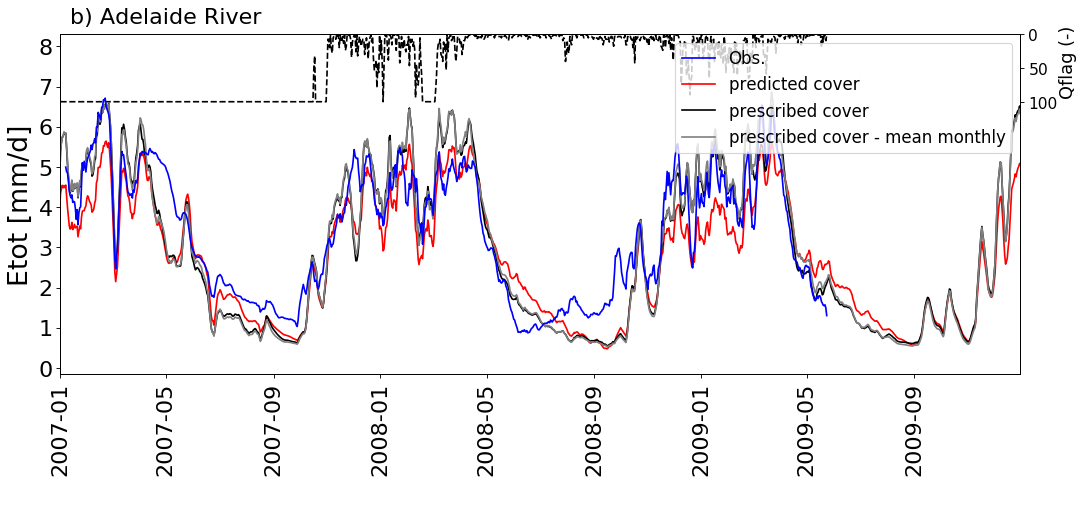

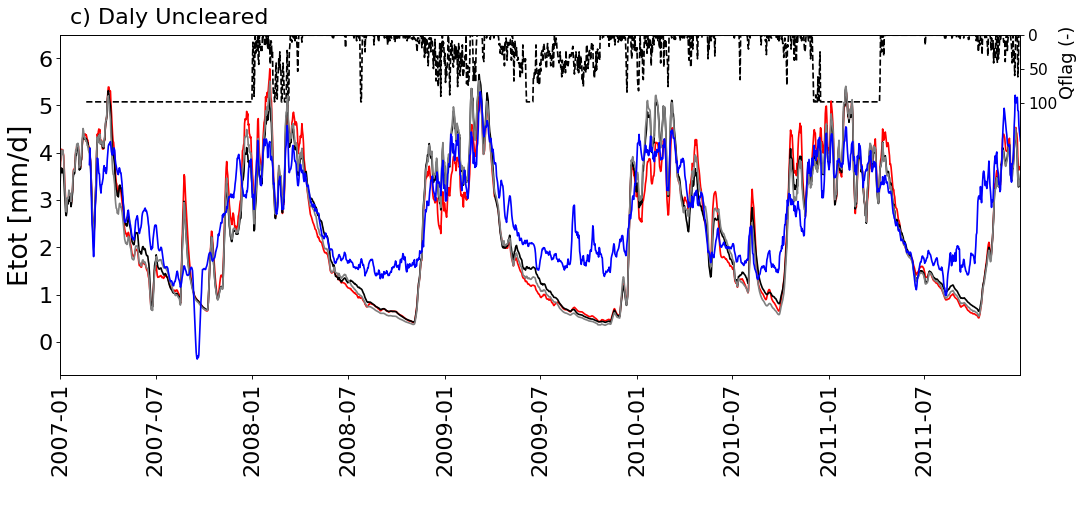

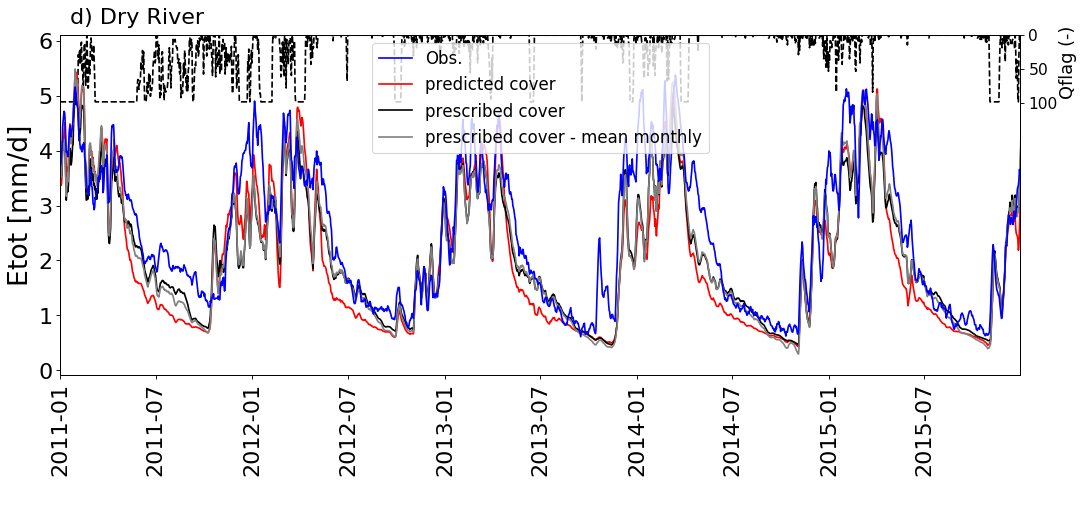

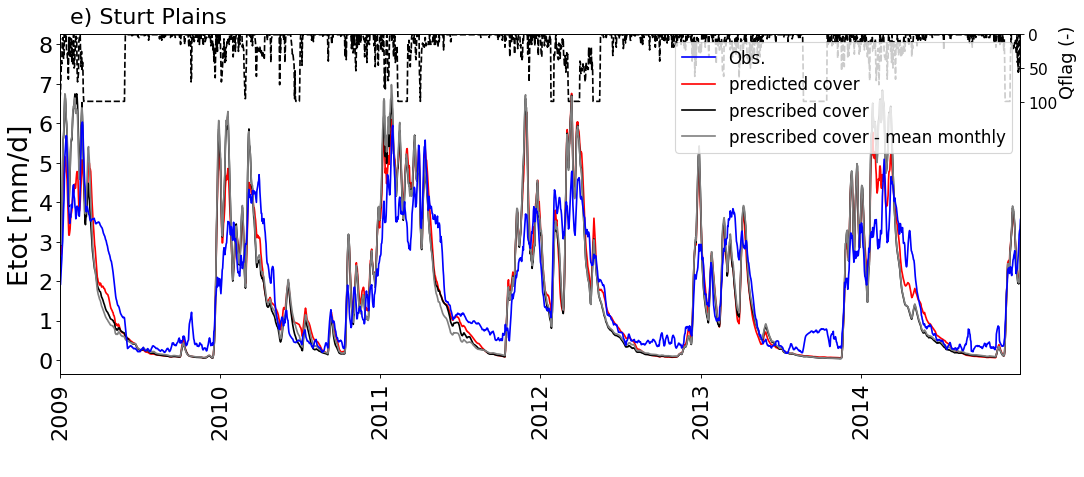

In [8]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn --moving_average 7 \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000  \
--ylabel "Etot [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "a) Howard Springs" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_howard.txt --colors red black gray --moving_average 7 \

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "b) Adelaide River" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_adelaide.txt --colors red black gray --moving_average 7\

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "c) Daly Uncleared"   \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_daly.txt --colors red black gray --moving_average 7\

#DryRiver 
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"   --title "d) Dry River" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_dry.txt --colors red black gray --moving_average 7 \

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "e) Sturt Plains" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_sturt.txt --colors red black gray --moving_average 7\




**Figure S4.3.** Comparison of total evaporation for the VOM with prescribed cover (red), predicted cover (gray) and fluxtower observations (blue) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results with prescribed vegetation cover are rather similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is predicted. 

### Transpiration trees

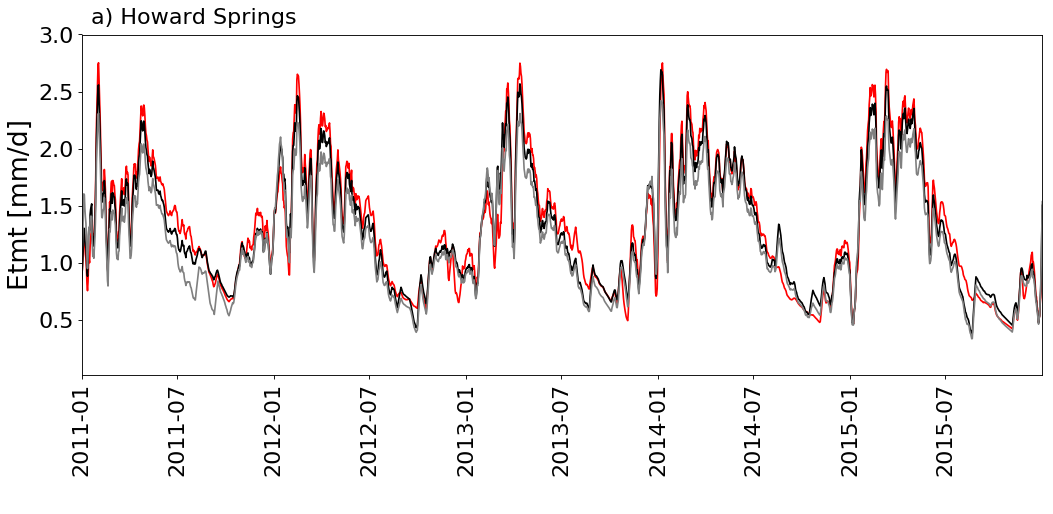

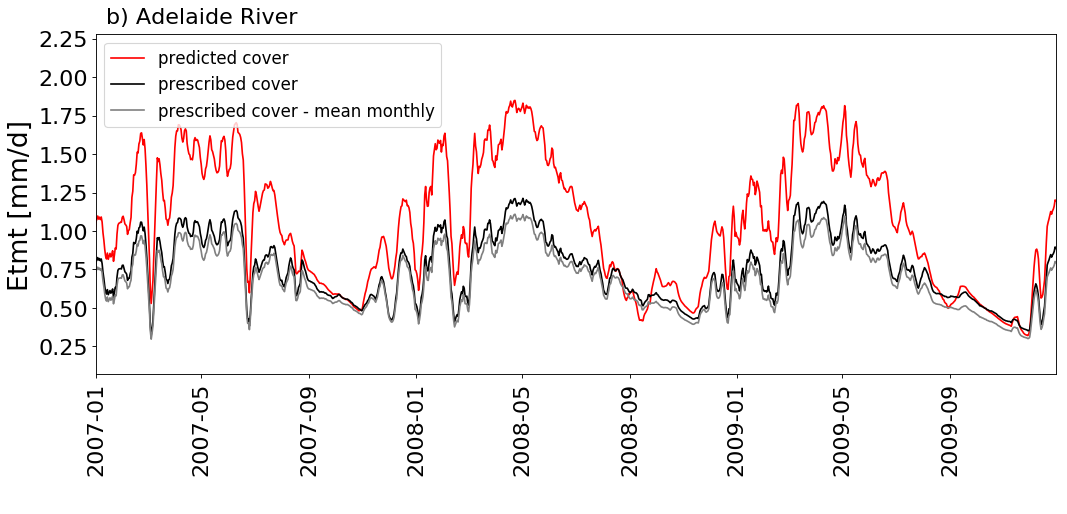

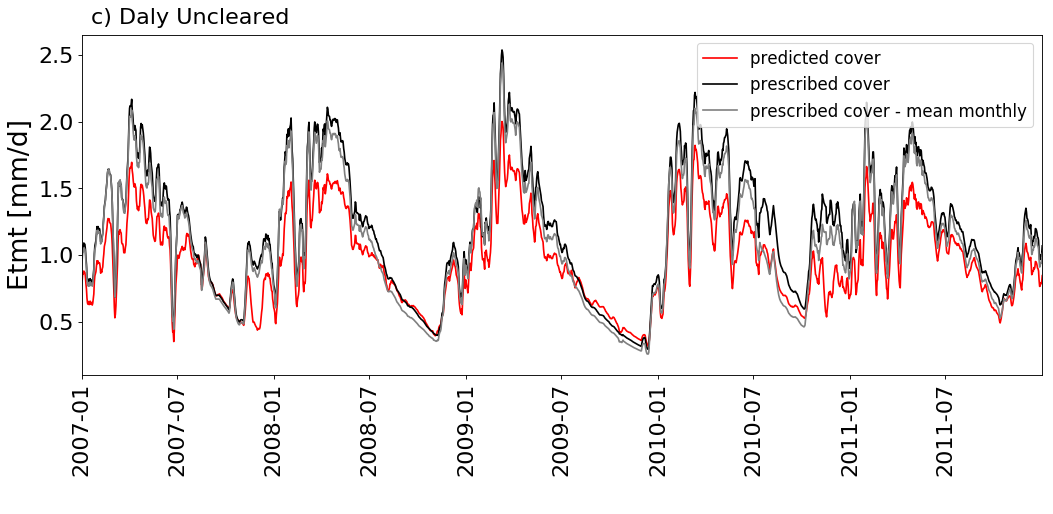

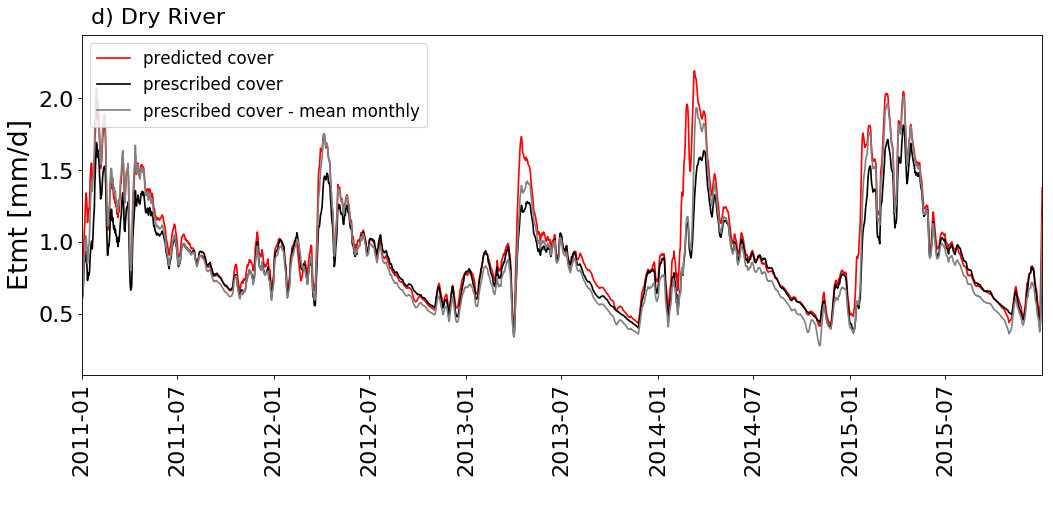

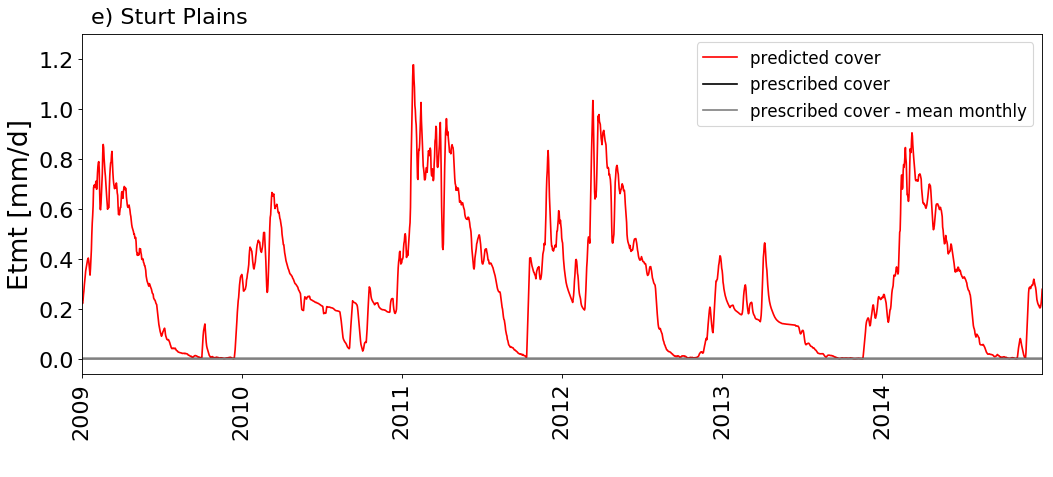

In [9]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "a) Howard Springs"   \
--colors red black gray --moving_average 7


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v etmt -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "b) Adelaide River" --legend True  \
--colors red black gray --moving_average 7

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v etmt -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels  "predicted cover" "prescribed cover" "prescribed cover - mean monthly" --title "c) Daly Uncleared" --legend True  \
--colors red black gray --moving_average 7
#DryRiver 
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "d) Dry River" --legend True  \
--colors red black gray --moving_average 7
#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v etmt -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "e) Sturt Plains" --legend True  \
--colors red black gray --moving_average 7



**Figure S4.4.** Transpiration of the perennial trees for prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Adelaide River c) Daly Uncleared, d) Dry River and e) Sturt Plains. The transpiration of trees is generally lower in case of prescribed vegetation cover, for Sturt Plains there is no transpiration from the threes as the tree cover was set to 0. 

### Transpiration grasses

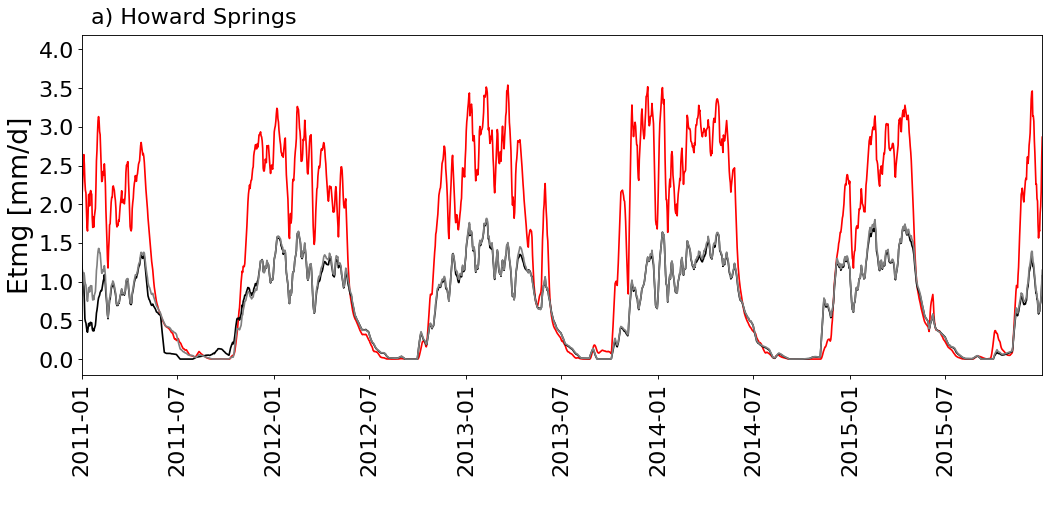

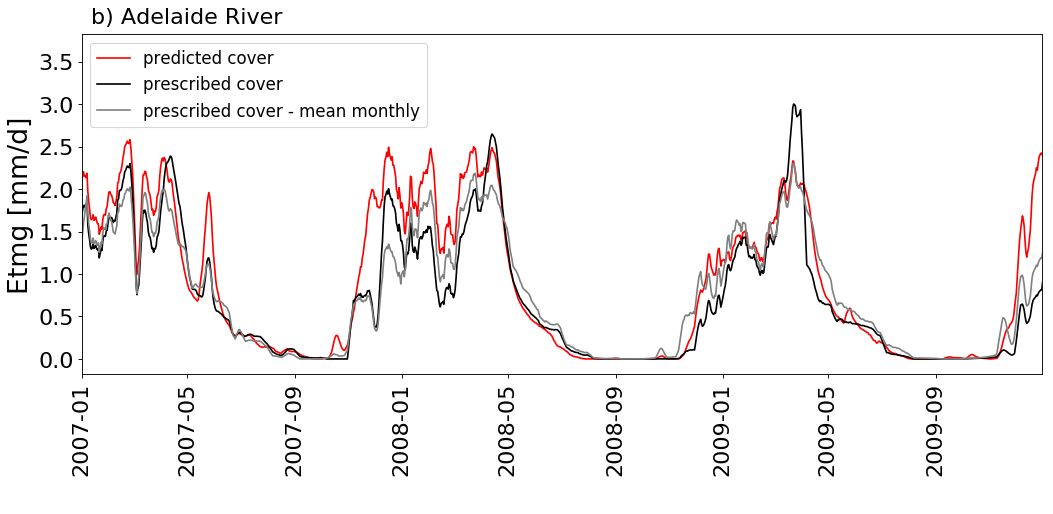

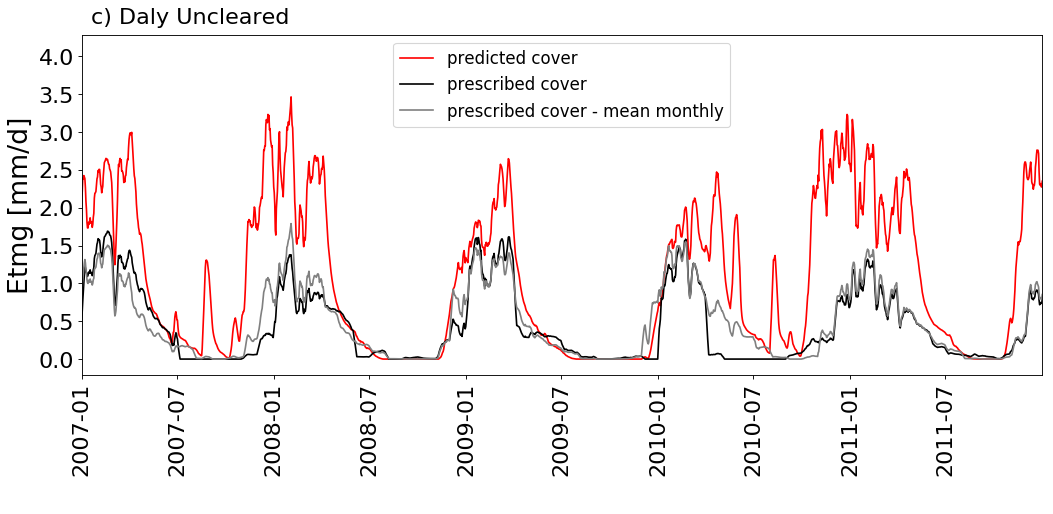

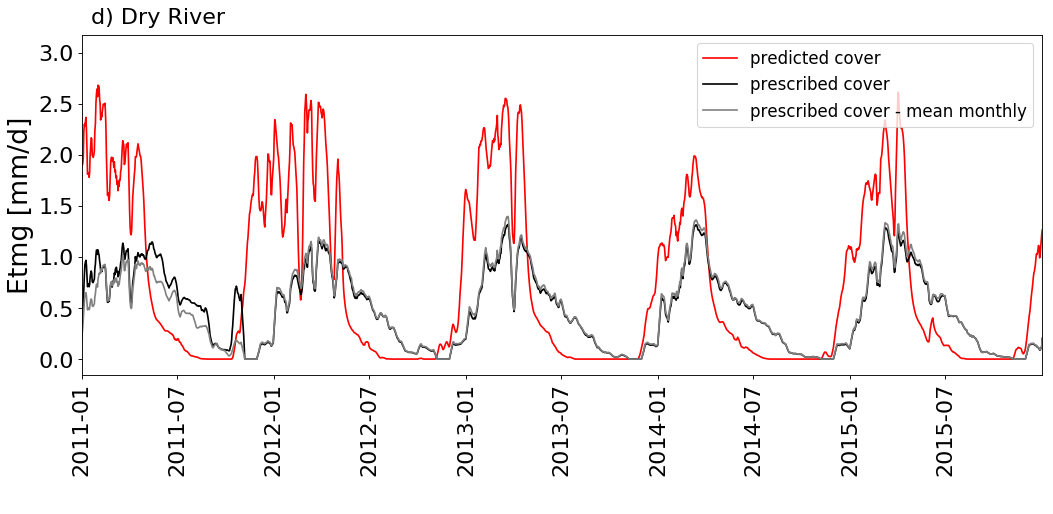

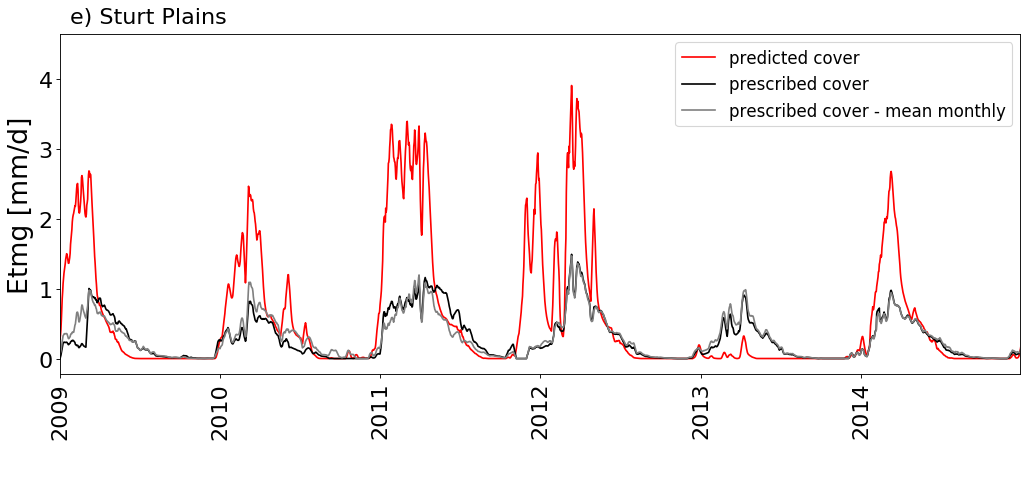

In [10]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "a) Howard Springs"  \
--colors red black gray --moving_average 7

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v etmg -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "b) Adelaide River" --legend True  \
--colors red black gray --moving_average 7



#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v etmg -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "c) Daly Uncleared" --legend True  \
--colors red black gray --moving_average 7

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "d) Dry River" --legend True  \
--colors red black gray --moving_average 7

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v etmg -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "predicted cover"  "prescribed cover" "prescribed cover - mean monthly" --title "e) Sturt Plains" --legend True  \
--colors red black gray --moving_average 7




**Figure S4.5.** Transpiration of the seasonal grasses for prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Adelaide River c) Daly Uncleared, d) Dry River and e) Sturt Plains.  The transpiration of grasses is generally lower in case of prescribed vegetation cover 

### Soil evaporation

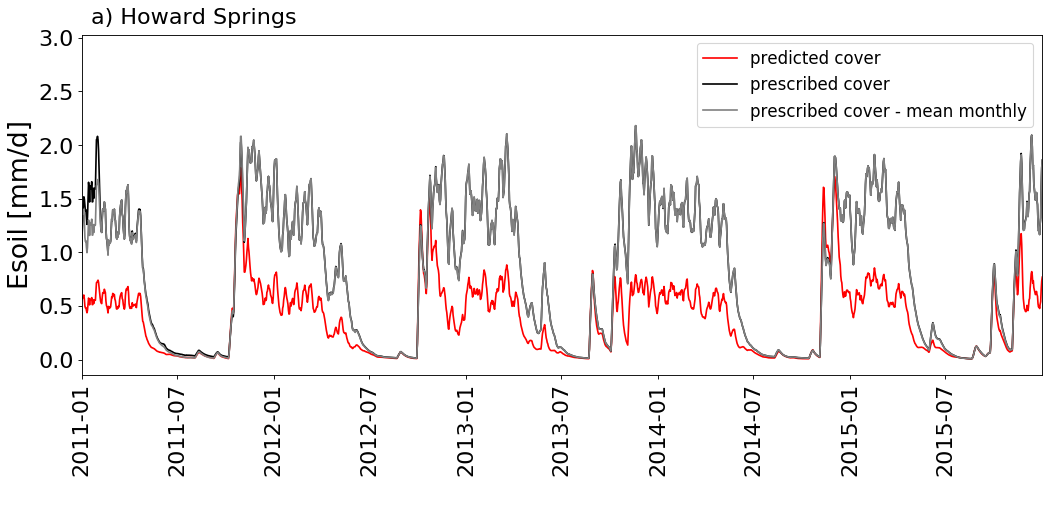

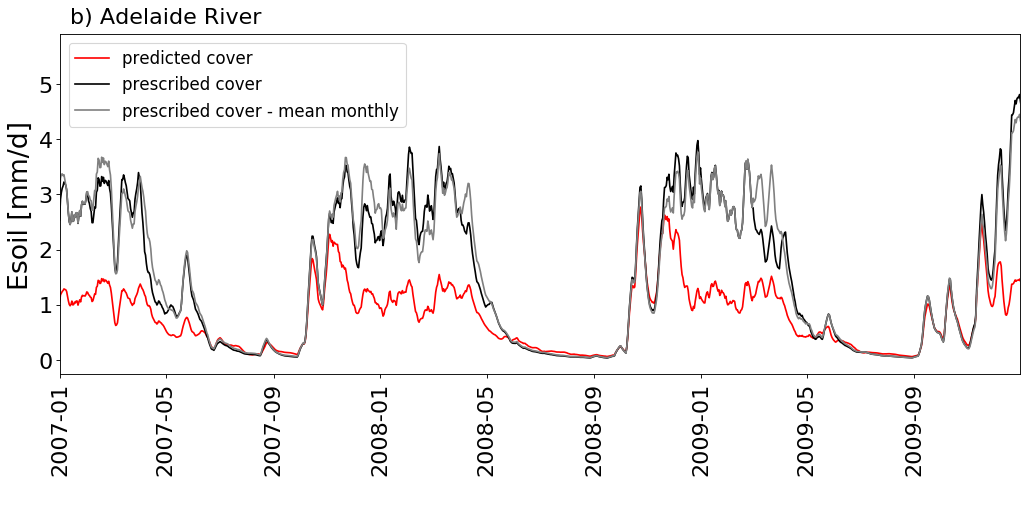

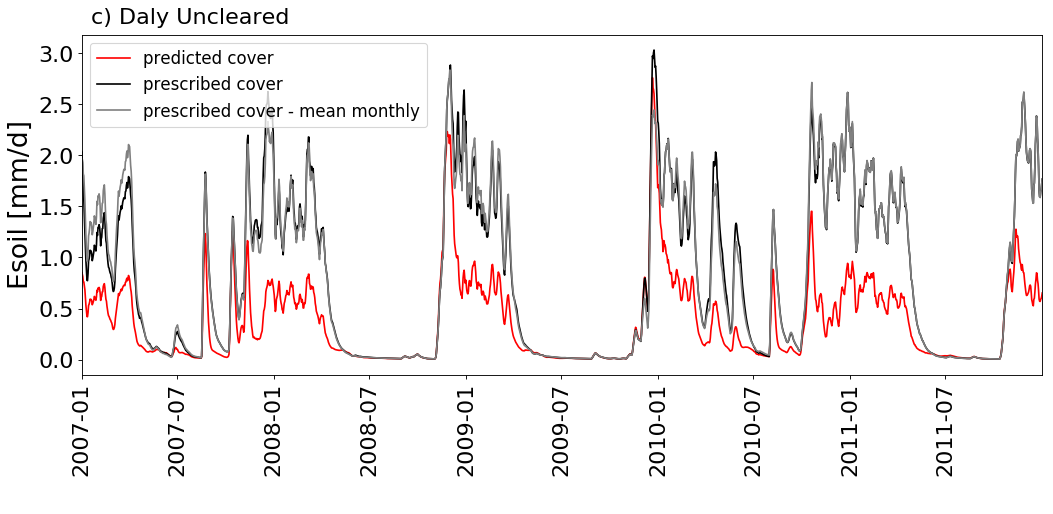

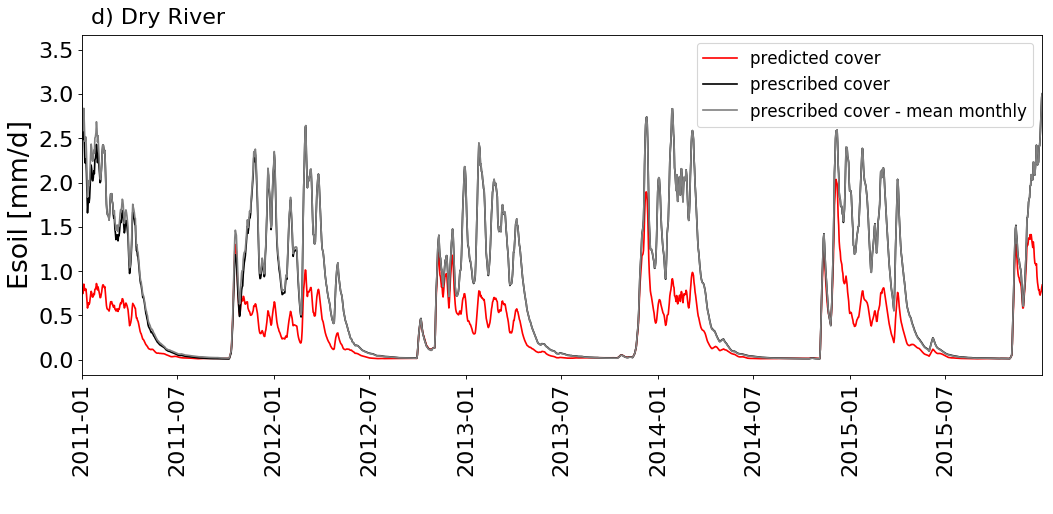

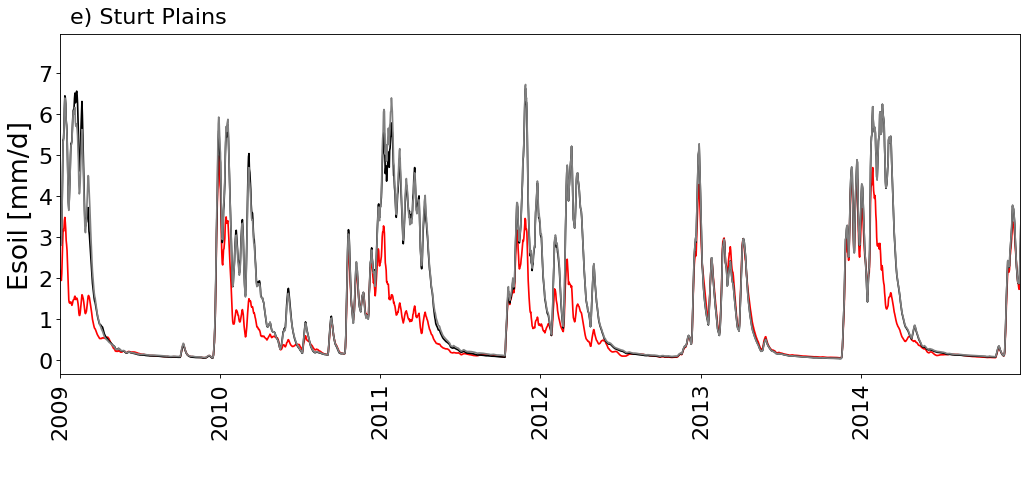

In [11]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "a) Howard Springs" --legend True  \
--colors red black gray --moving_average 7

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v esoil -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "b) Adelaide River" --legend True  \
--colors red black gray --moving_average 7

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v esoil -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "c) Daly Uncleared" --legend True  \
--colors red black gray --moving_average 7

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "d) Dry River" --legend True  \
--colors red black gray --moving_average 7

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v esoil -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "e) Sturt Plains"   \
--colors red black gray --moving_average 7




**Figure S4.6.** Soil evaporation for prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains.  The soil evaporation compensates for the reduced values of transpiration and is higher for prescribed cover. 

## Timeseries of assimilation


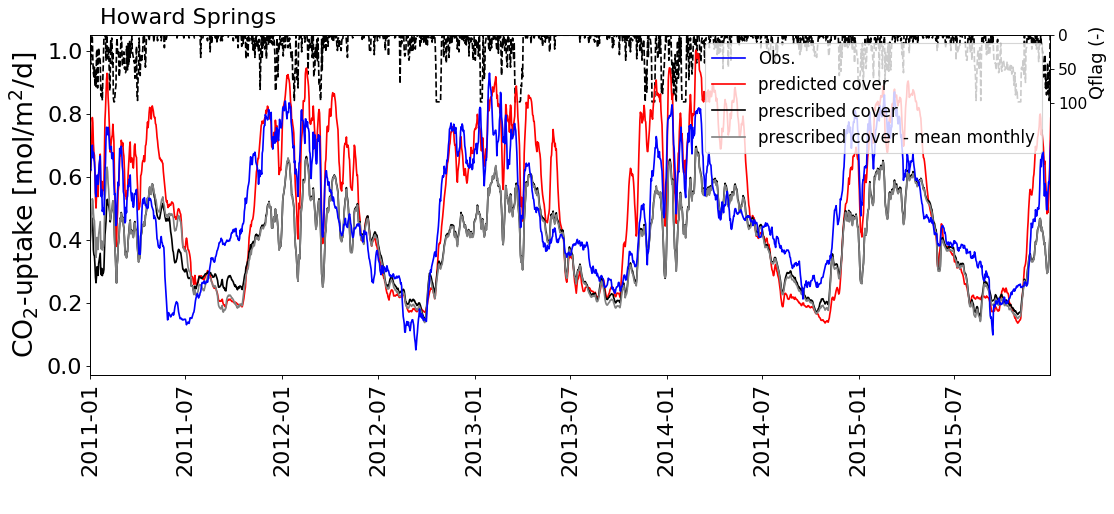

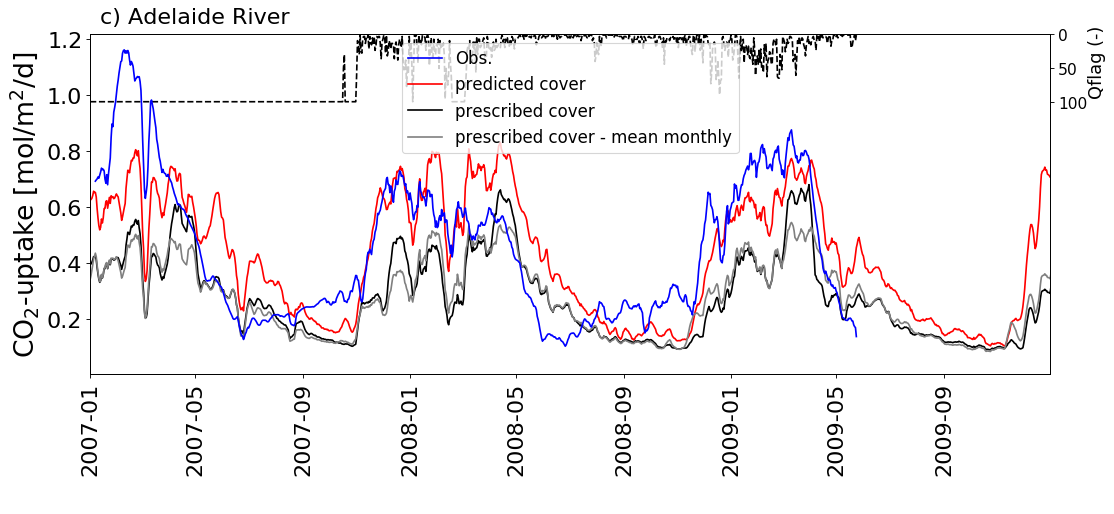

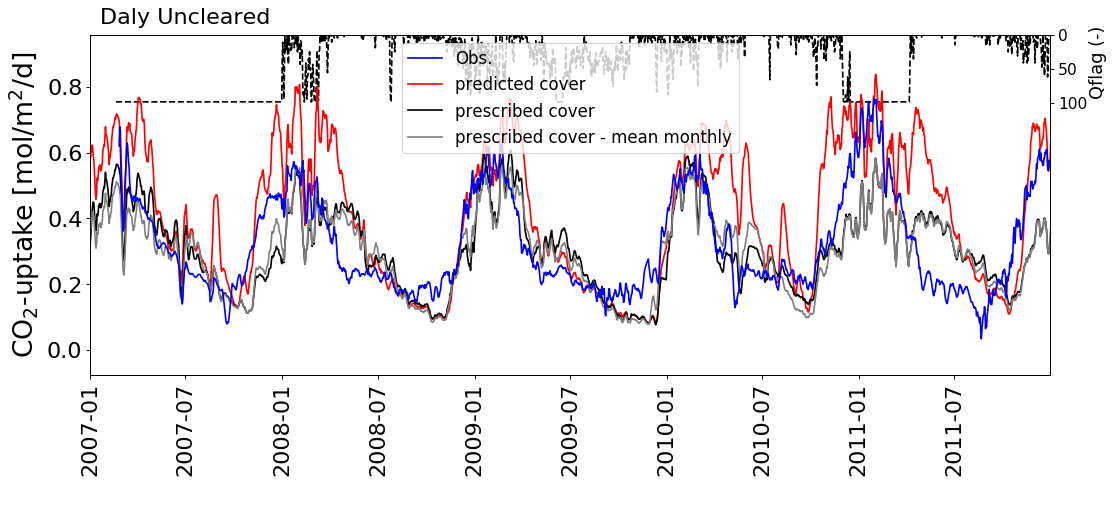

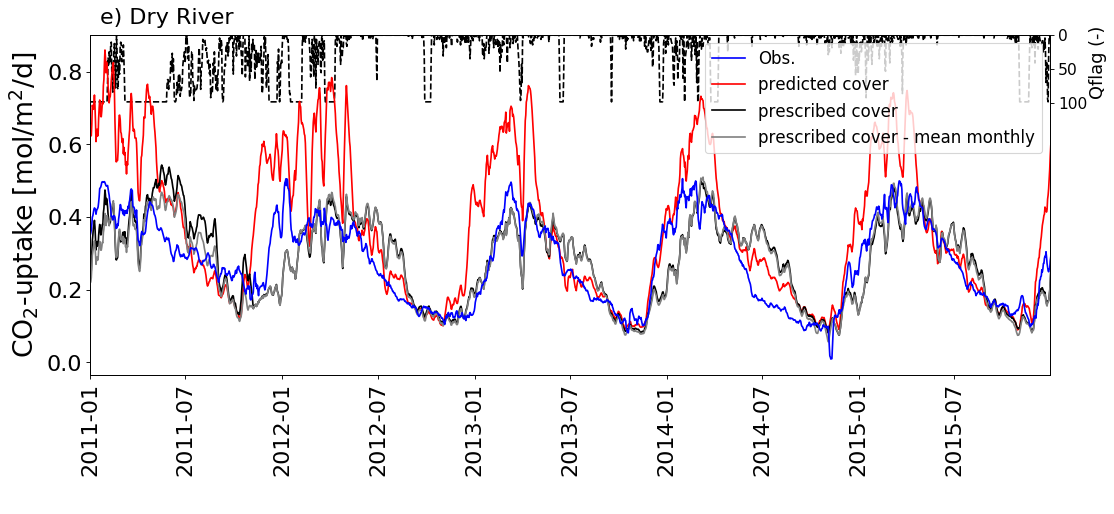

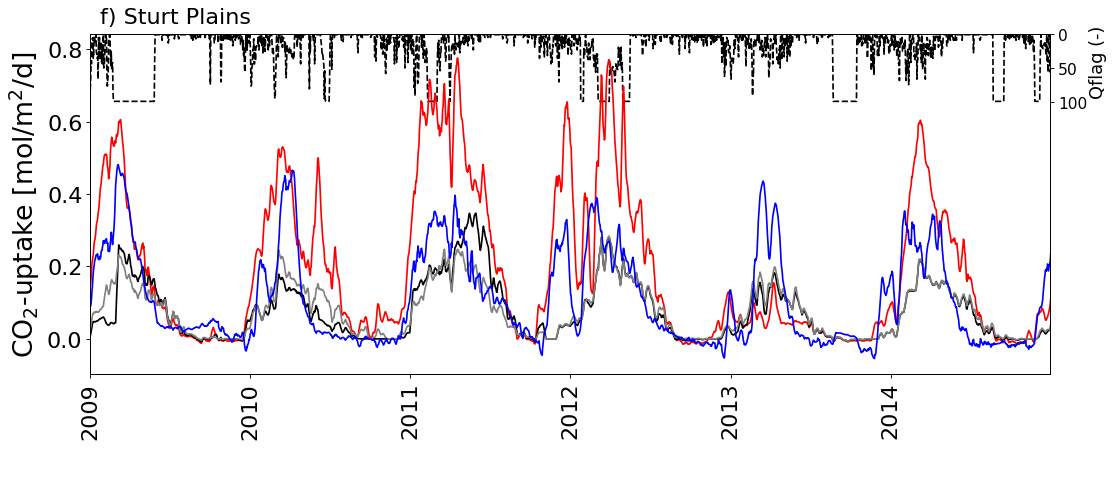

In [12]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "Howard Springs" --legend True  \
--colors red black gray --obs_qc ../../data/DINGO_QC/FcQ_howard.txt --moving_average 7


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"   --title "c) Adelaide River" --legend True  \
--colors red black gray --obs_qc ../../data/DINGO_QC/FcQ_adelaide.txt --moving_average 7

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "Daly Uncleared" --legend True  \
--colors red black gray --obs_qc ../../data/DINGO_QC/FcQ_daly.txt --moving_average 7

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"   --title "e) Dry River" --legend True  \
--colors red black gray --obs_qc ../../data/DINGO_QC/FcQ_dry.txt --moving_average 7

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "f) Sturt Plains"  \
--colors red black gray --obs_qc ../../data/DINGO_QC/FcQ_sturt.txt --moving_average 7




**Figure S4.7.** Comparison of total assimilation for the VOM with prescribed cover (red), predicted cover (gray) and fluxtower observations (blue) for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The prescribed cover generally improves the delay in decaying CO$_2$-uptake at the end of the wet season. At the same time, assimilation is reduced during the wet season and the peaks with the predicted cover disappear. Especially the drier sites of Daly Uncleared, Dry River, and Sturt Plains show a better agreement with the observations when vegetation cover is prescribed, but Adelaide River and Howard Springs start to underestimate the CO$_2$-uptake.


### Assimilation trees

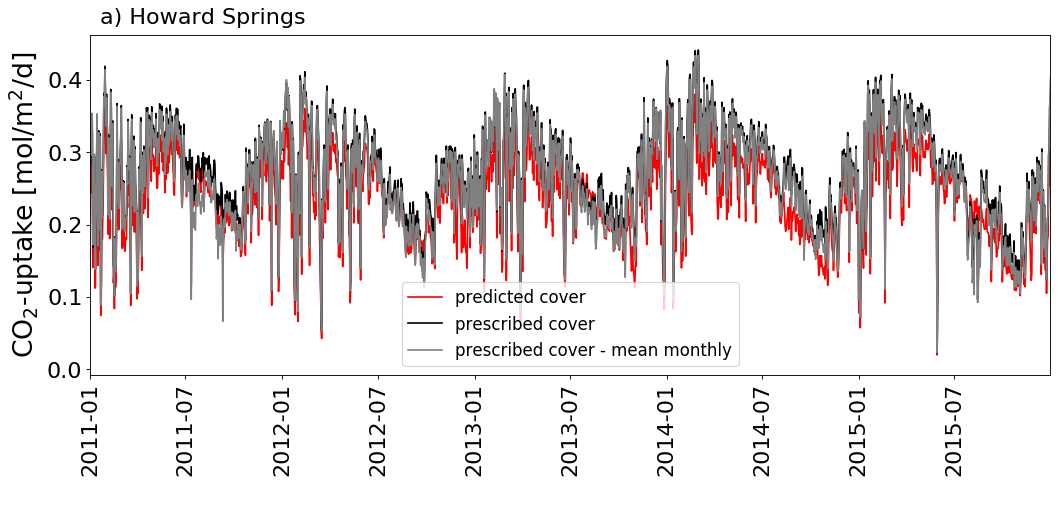

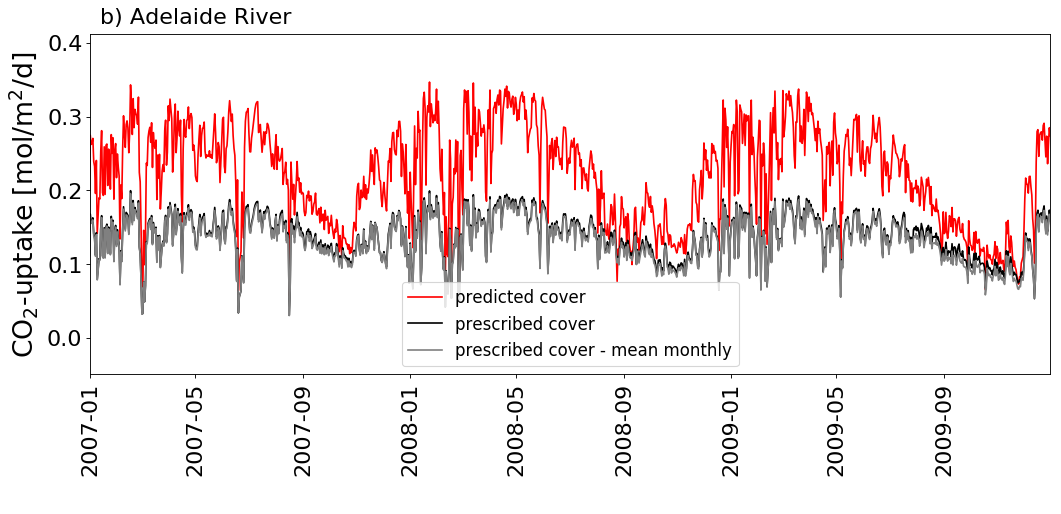

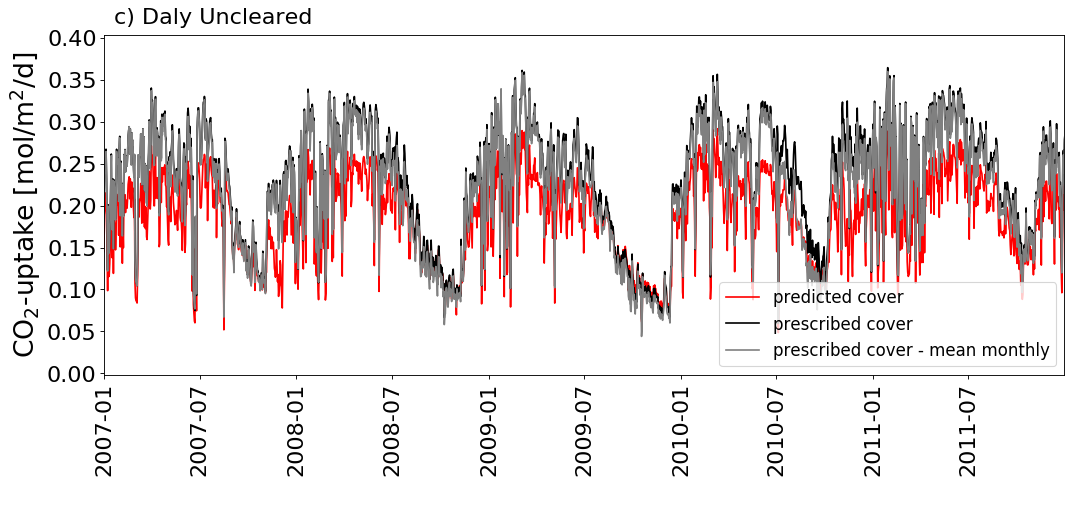

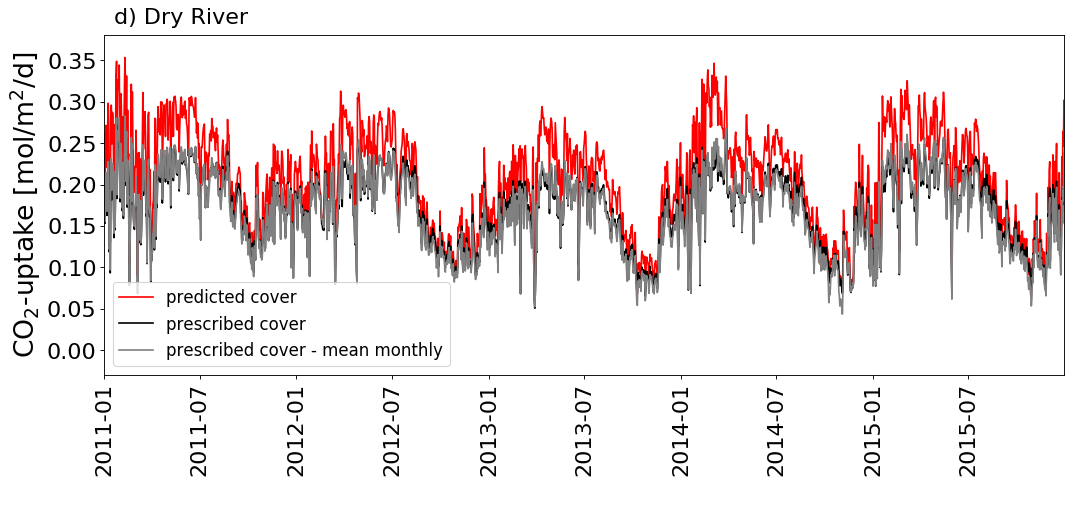

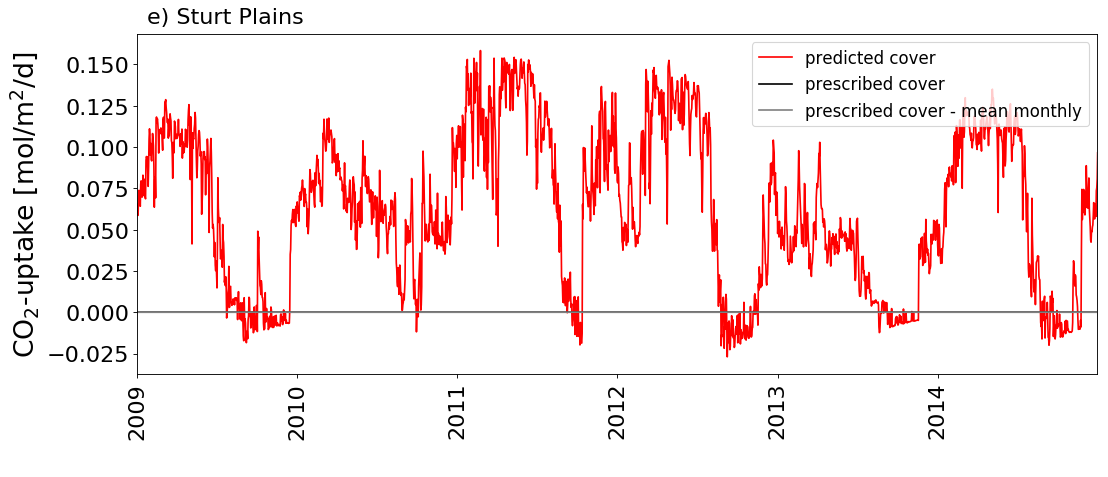

In [13]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v asst -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "a) Howard Springs" --legend True  \
--colors red black gray 


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v asst -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover"  "prescribed cover" "prescribed cover - mean monthly"  --title "b) Adelaide River" --legend True  \
--colors red black gray 



#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v asst -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "c) Daly Uncleared" --legend True  \
--colors red black gray 

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v asst -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover"  "prescribed cover" "prescribed cover - mean monthly"  --title "d) Dry River" --legend True  \
--colors red black gray 

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v asst -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "e) Sturt Plains" --legend True  \
--colors red black gray 




**Figure S4.8.** Comparison of tree assimilation for the VOM with prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Adelaide River c) Daly Uncleared, d) Dry River and e) Sturt Plains. The prescribed cover gives higher values of assimilation for Howard Springs, Litchfield and Daly Uncleared, but the assimilation goes down for Dry River and Sturt Plains.

### Assimilation grasses

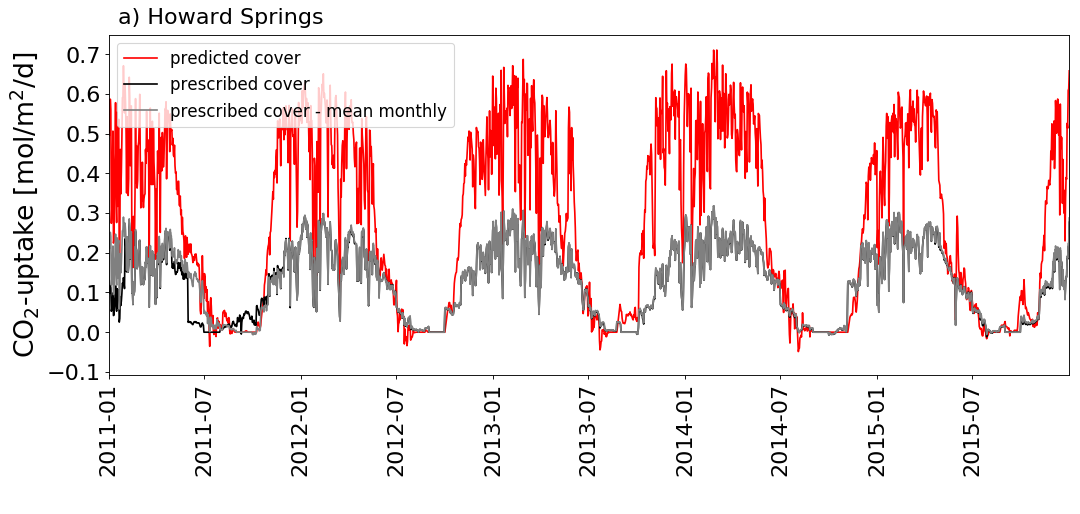

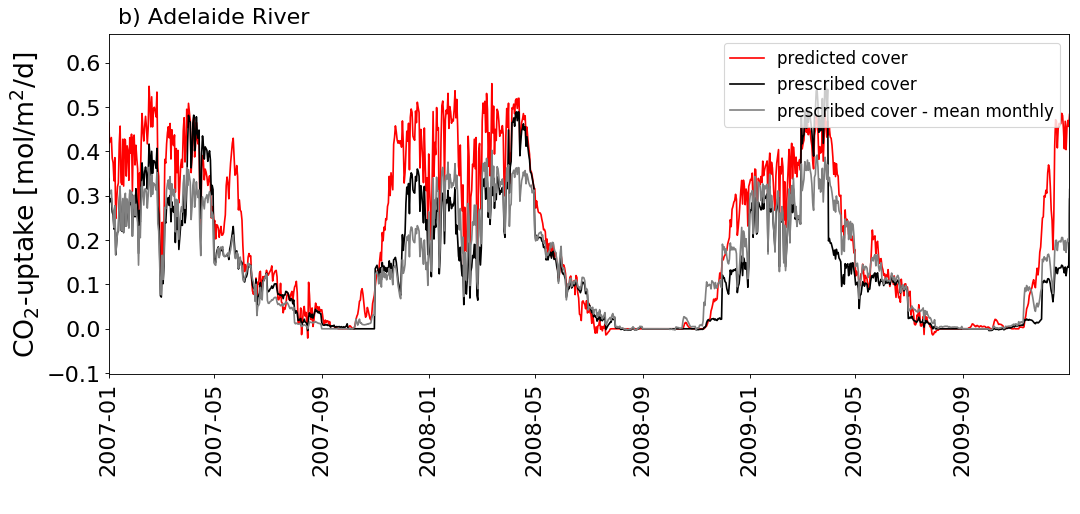

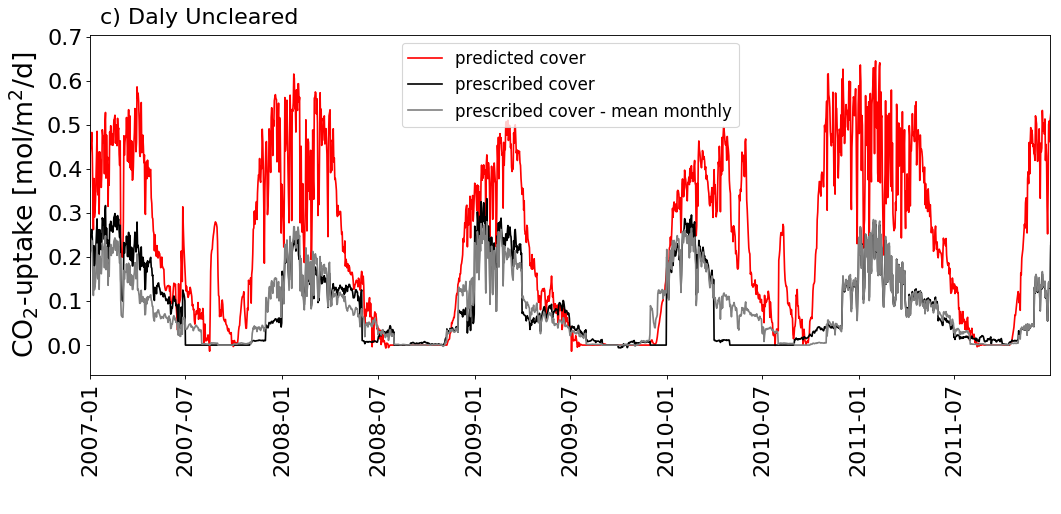

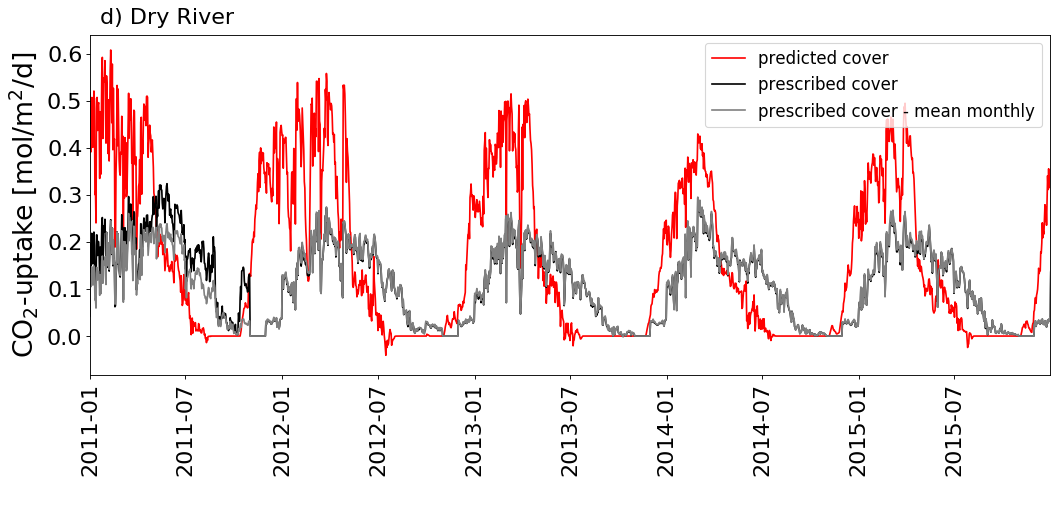

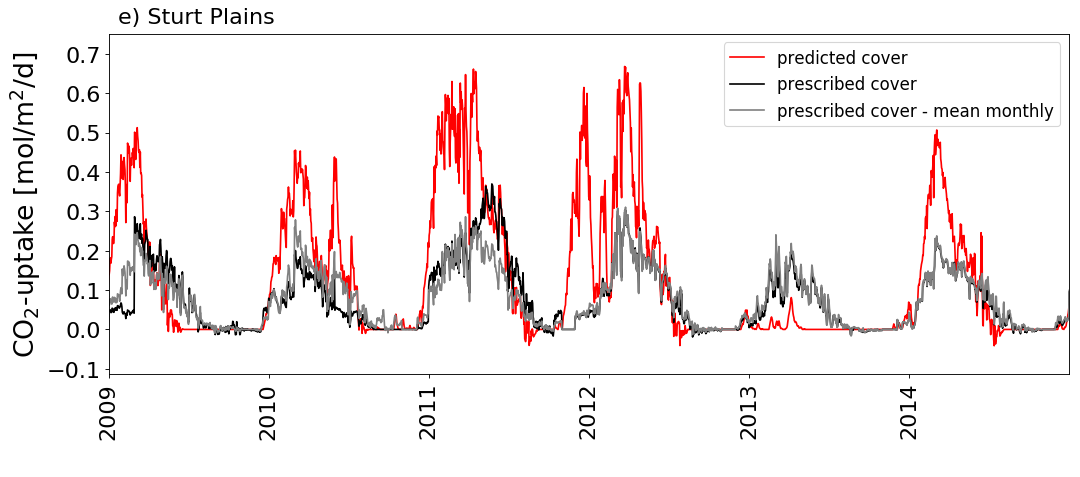

In [14]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-v assg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "a) Howard Springs" --legend True  \
--colors red black gray 


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-v assg -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"   --title "b) Adelaide River" --legend True  \
--colors red black gray 

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-v assg -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "c) Daly Uncleared" --legend True  \
--colors red black gray 

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-v assg -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]"\
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"   --title "d) Dry River" --legend True  \
--colors red black gray 

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-v assg -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly"  --title "e) Sturt Plains" --legend True  \
--colors red black gray 




**Figure S4.9.** Comparison of grass assimilation for the VOM with prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains. The prescribed cover always gives lower values of grass assimilation for all sites.

##  Partitioning fluxes

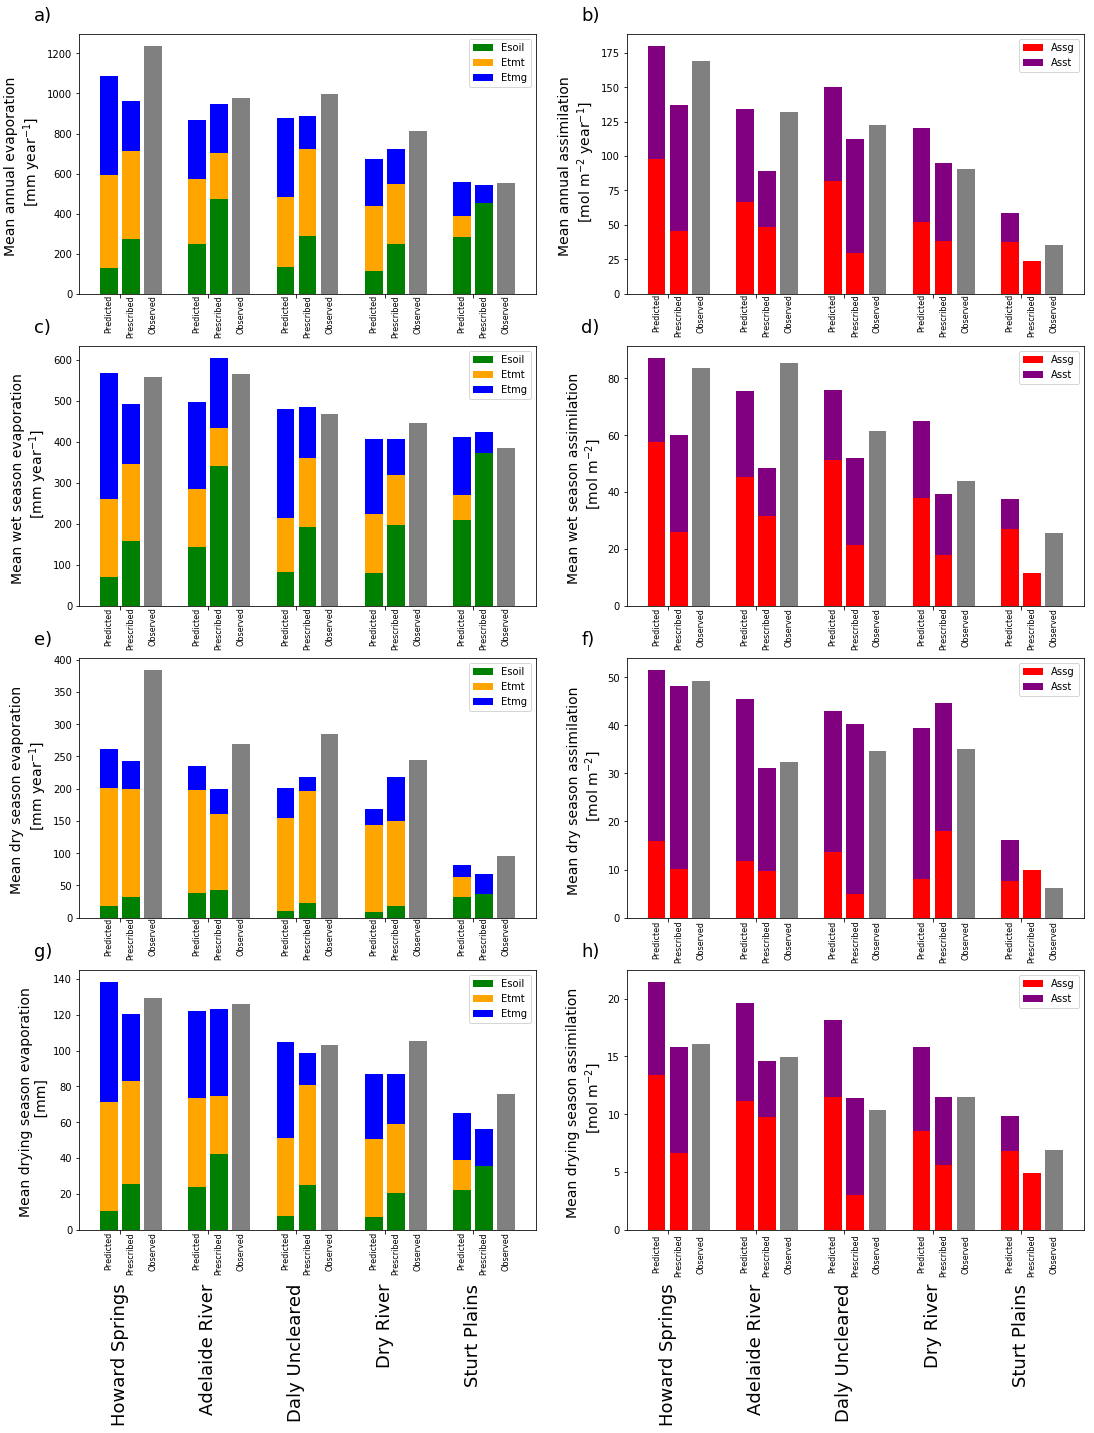

In [15]:
%run ../../src_py/plot_fluxpartitions.py \
--evap_obs ../../data/DINGO/Ea_howard.txt \
../../data/DINGO/Ea_adelaide.txt ../../data/DINGO/Ea_daly.txt \
../../data/DINGO/Ea_dry.txt \
../../data/DINGO/Ea_sturt.txt \
--ass_obs ../../data/DINGO/GPPdaily_howard.txt \
../../data/DINGO/GPPdaily_adelaide.txt ../../data/DINGO/GPPdaily_daly.txt \
../../data/DINGO/GPPdaily_dry.txt ../../data/DINGO/GPPdaily_sturt.txt \
--pred_cover ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt --pres_cover ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
--startyear_obs 2002 2007 2008 2009 2009 --endyear_obs 2017 2008 2017 2017 2009 \
--startyear_mod 1995 1995 1995 1995 1995 1995 \
--endyear_mod 2015 2015 2015 2015 2015 2015 \
--sites "Howard Springs" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--figsize 18 22 --loc_title -0.1 1.05 --labsize 8

**Figure S4.10.** Partitioning of the fluxes for a) evaporatin and b) assimilation, flux tower observations are shown in gray. The prescribed cover always gives lower values of grass assimilation grass transpiration for all sites.

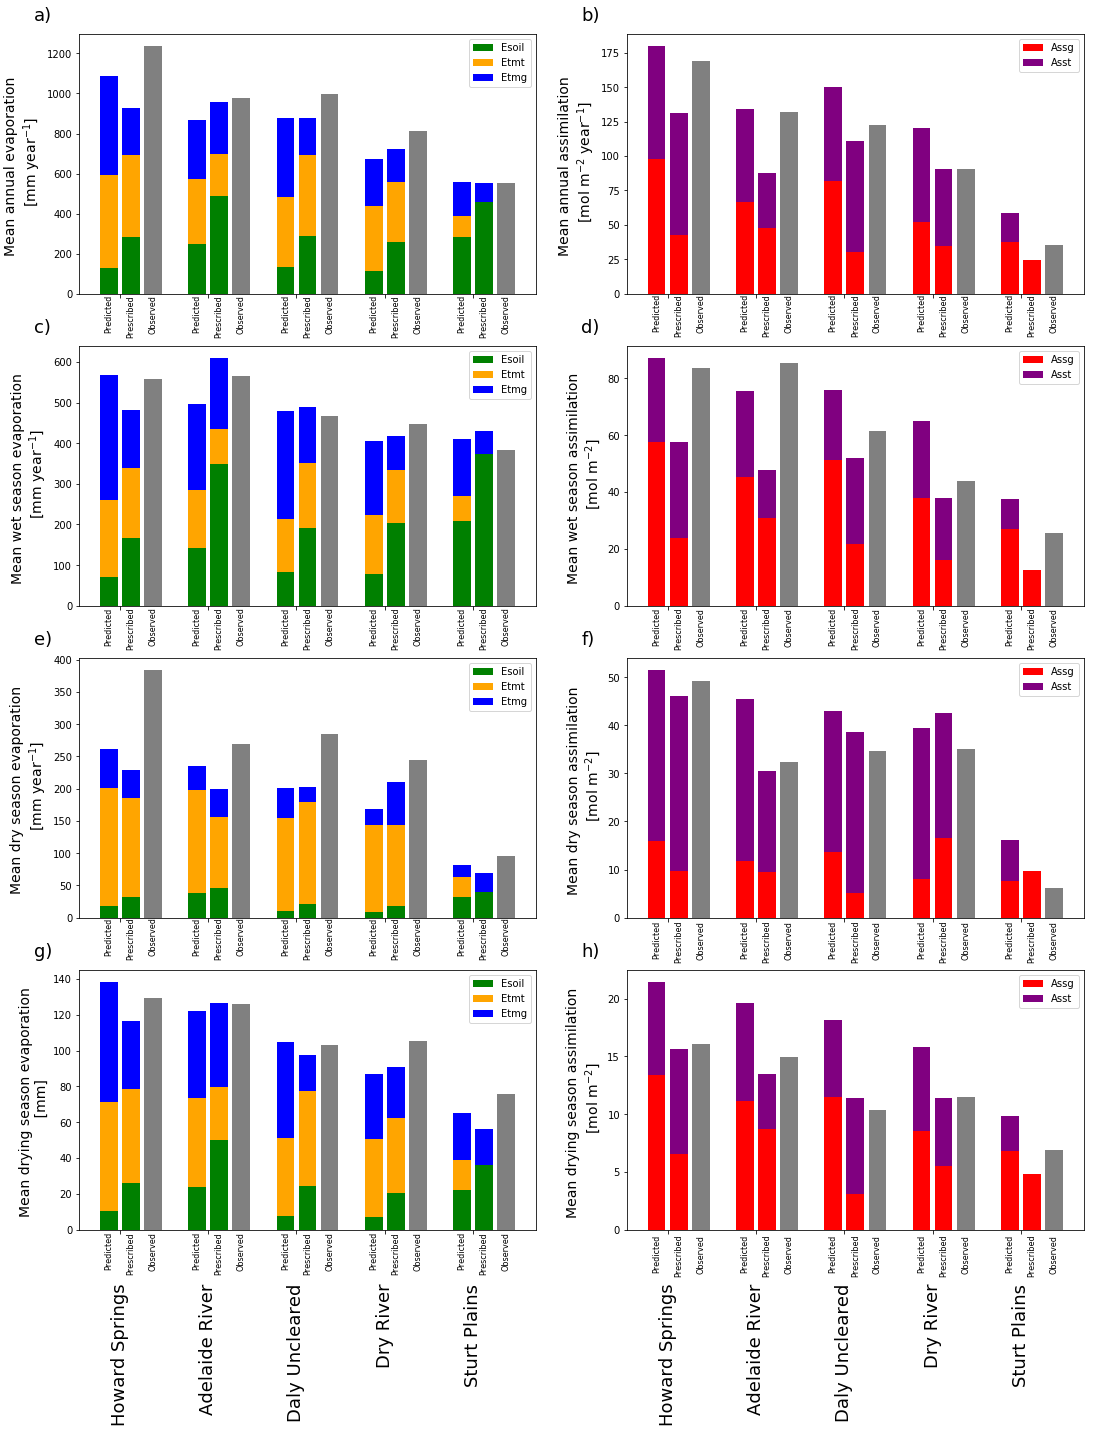

In [16]:
%run ../../src_py/plot_fluxpartitions.py \
--evap_obs ../../data/DINGO/Ea_howard.txt \
../../data/DINGO/Ea_adelaide.txt ../../data/DINGO/Ea_daly.txt \
../../data/DINGO/Ea_dry.txt \
../../data/DINGO/Ea_sturt.txt \
--ass_obs ../../data/DINGO/GPPdaily_howard.txt \
../../data/DINGO/GPPdaily_adelaide.txt ../../data/DINGO/GPPdaily_daly.txt \
../../data/DINGO/GPPdaily_dry.txt ../../data/DINGO/GPPdaily_sturt.txt \
--pred_cover ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt --pres_cover ../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
--startyear_obs 2002 2007 2008 2009 2009 --endyear_obs 2017 2008 2017 2017 2009 \
--startyear_mod 1995 1995 1995 1995 1995 1995 \
--endyear_mod 2015 2015 2015 2015 2015 2015 \
--sites "Howard Springs" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--figsize 18 22 --loc_title -0.1 1.05 --labsize 8

**Figure S4.11.** Partitioning of the fluxes for a) evaporation and b) assimilation, flux tower observations are shown in gray. The prescribed cover is here based solely on mean monthly values.

## Parameters

<Figure size 1280x400 with 0 Axes>

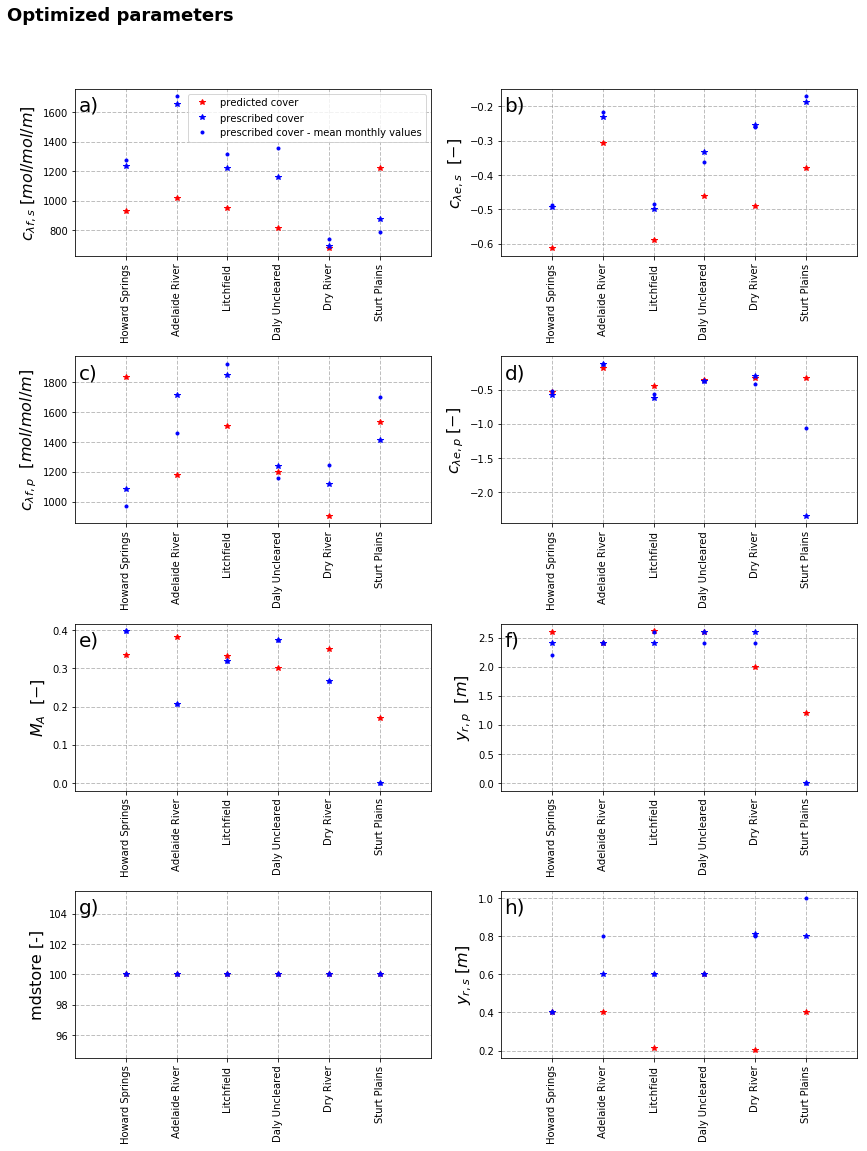

In [17]:
#plot parameters

basin = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains"]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]



fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
#fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6) )  = plt.subplots(nrows=1, ncols=7, figsize=(16, 5)) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15)) 
ax = axes.flat


for ibasin in  np.array([0, 1, 2, 3, 4, 5]):  
    
    #loop over files and load
    try:
        params = np.loadtxt("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d
    except OSError:
        print("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d
  
    try:
        params_pc = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc = np.loadtxt("../../work/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
    try:
        params_pc2 = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover2/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc2 = np.loadtxt("../../work/additional_analyses/prescribed_cover2/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
        
    #for irun in range(0,4):
    if(ibasin == 0):
        ax[0].plot([ibasin], params[0], "r*" , label = "predicted cover" ) 
        ax[0].plot([ibasin], params_pc[0], "b*" , label =  "prescribed cover" ) 
        ax[0].plot([ibasin], params_pc2[0], "b." , label =  "prescribed cover - mean monthly values" ) 

    else:
        ax[0].plot([ibasin], params[0], "r*" ) 
        ax[0].plot([ibasin], params_pc[0], "b*" )
        ax[0].plot([ibasin], params_pc2[0], "b." ) 

        
    ax[1].plot([ibasin], params[1], "r*" , label = "VOM" ) 
    ax[1].plot([ibasin], params_pc[1], "b*"  )
    ax[1].plot([ibasin], params_pc2[1], "b." ) 


    ax[2].plot([ibasin], params[2], "r*" , label = "VOM" ) 
    ax[2].plot([ibasin], params_pc[2], "b*"  ) 
    ax[2].plot([ibasin], params_pc2[2], "b."  ) 

    ax[3].plot([ibasin], params[3], "r*" , label = "VOM" ) 
    ax[3].plot([ibasin], params_pc[3], "b*" )
    ax[3].plot([ibasin], params_pc2[3], "b." )

    ax[4].plot([ibasin], params[4], "r*" , label = "VOM" ) 
    ax[4].plot([ibasin], params_pc[4], "b*"  )
    ax[4].plot([ibasin], params_pc2[4], "b."  ) 

    ax[5].plot([ibasin], params[5], "r*" , label = "VOM" ) 
    ax[5].plot([ibasin], params_pc[5], "b*" ) 
    ax[5].plot([ibasin], params_pc2[5], "b."  ) 

    ax[6].plot([ibasin], params[6], "r*" , label = "VOM" ) 
    ax[6].plot([ibasin], params_pc[6], "b*" ) 
    ax[6].plot([ibasin], params_pc2[6], "b." ) 
    
    ax[7].plot([ibasin], params[7], "r*" , label = "VOM" ) 
    ax[7].plot([ibasin], params_pc[7], "b*") 
    ax[7].plot([ibasin], params_pc2[7], "b.") 


#ax0.set_ylim([0,10])  
ax[0].set_xlim( -1, 6  )     
ax[0].set_xticks( [0,1,2,3,4,5] )  
ax[0].set_xticklabels( site_names, rotation=90 )  
ax[0].set_ylabel(r"$c_{\lambda f,s}$ $[mol/mol/m ]$", size=16 )  
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[0].text(0.01, 0.9, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[0].legend()

#ax1.set_ylim([0,10])  
ax[1].set_xlim( -1, 6  )     
ax[1].set_xticks( [0,1,2,3,4,5] )  
ax[1].set_xticklabels( site_names, rotation=90 )  
ax[1].set_ylabel(r"$c_{\lambda e,s}$  $[-]$", size=16 )  
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[1].text(0.01, 0.9, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

#ax2.set_ylim([0,1]) 
ax[2].set_xlim( -1, 6  ) 
ax[2].set_xticks( [0,1,2,3,4,5] )  
ax[2].set_xticklabels( site_names, rotation=90 )  
ax[2].set_ylabel(r"$c_{\lambda f,p}$  $[mol/mol/m ]$", size=16 )
ax[2].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[2].text(0.01, 0.9, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

#ax0.set_ylim([0,1])  
ax[3].set_xlim( -1, 6  )   
ax[3].set_xticks( [0,1,2,3,4,5] )  
ax[3].set_xticklabels( site_names, rotation=90 )  
ax[3].set_ylabel(r"$c_{\lambda e,p}$ $[-]$", size=16 ) 
ax[3].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[3].text(0.01, 0.9, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

#ax1.set_ylim([0,10])  
ax[4].set_xlim( -1, 6  )     
ax[4].set_xticks( [0,1,2,3,4,5] )  
ax[4].set_xticklabels( site_names, rotation=90 )  
ax[4].set_ylabel(r"$M_A$  $[-]$", size=16 )  
ax[4].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[4].text(0.01, 0.9, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

#ax2.set_ylim([0,1]) 
ax[5].set_xlim( -1, 6  ) 
ax[5].set_xticks( [0,1,2,3,4,5] )  
ax[5].set_xticklabels( site_names, rotation=90 )  
ax[5].set_ylabel(r"$y_{r,p}$  $[m]$", size=16 )  
ax[5].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[5].text(0.01, 0.9, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)

ax[6].set_xlim( -1, 6  ) 
ax[6].set_xticks( [0,1,2,3,4,5] )  
ax[6].set_xticklabels( site_names, rotation=90 )  
ax[6].set_ylabel("mdstore [-]", size=16 )  
ax[6].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[6].text(0.01, 0.9, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)

ax[7].set_xlim( -1, 6  ) 
ax[7].set_xticks( [0,1,2,3,4,5] )  
ax[7].set_xticklabels( site_names, rotation=90 )  
ax[7].set_ylabel(r"$y_{r,s}$ $[m]$", size=16 )  
ax[7].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[7].text(0.01, 0.9, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)


plt.figtext( x=0, y=1.05, s="Optimized parameters", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()


**Figure S4.11.** Optimal vegetation parameters for prescribed cover (blue) and predicted cover (red) , for a) and b) the two parameters $c_{\lambda f,s}$ and  $c_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters $c_{\lambda f,p}$ and $c_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation $M_{A,p}$, f) the rooting depth for the perennial vegetation $y_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation $y_{r,s}$. A clear pattern seems absent, except for grass rooting depths that seem to increase for the prescribed cover at drier sites.

## Relative errors


<Figure size 1280x400 with 0 Axes>

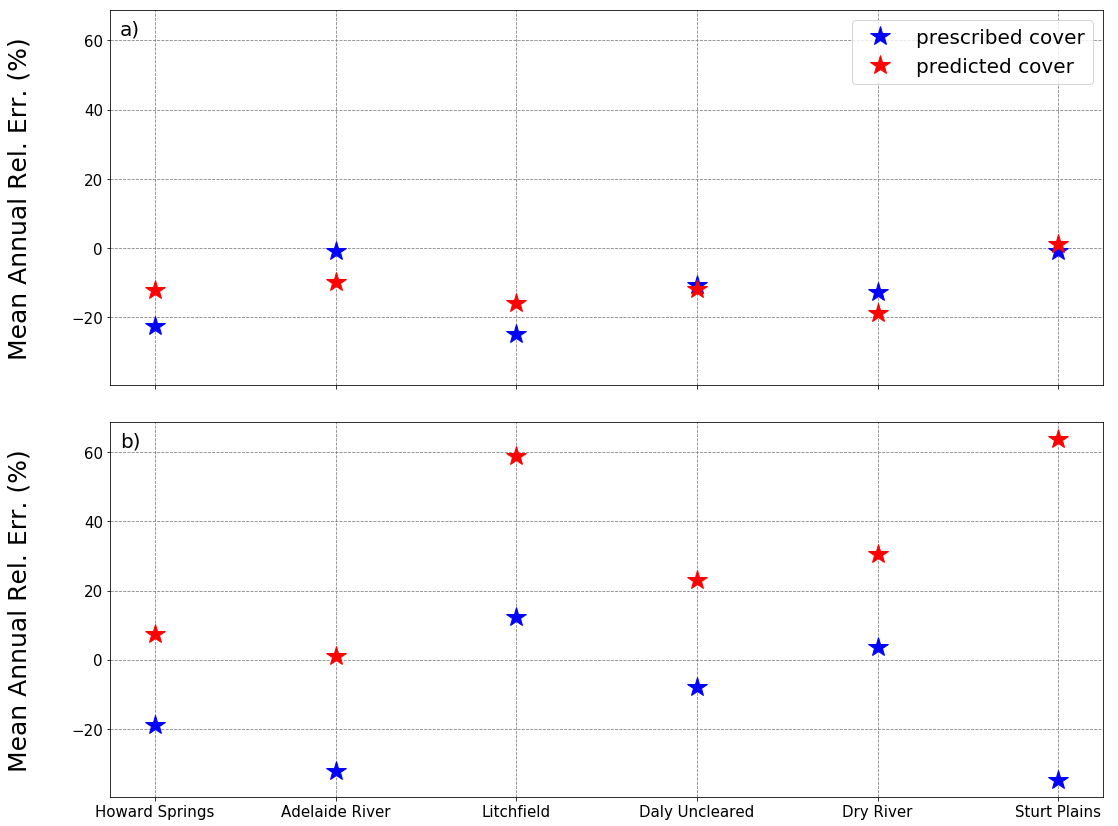

In [18]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
i_basin = 0
add_labels = 1

#loop over all sites
for site in study_sites:
    

    try:
        pc_ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/evap_beststats.txt") 

        pc_assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")              

        ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt") #mm/d          
        
        if(add_labels  == 1):
            ax[0].plot(i_basin, pc_ebest_stats[1]*100, '*b', markersize=20, label="prescribed cover" ) 
            ax[1].plot(i_basin, pc_assbest_stats[1]*100, '*b', markersize=20, label="prescribed cover" ) 
            ax[0].plot(i_basin, ebest_stats[1]*100, '*r', markersize=20, label="predicted cover" ) 
            ax[1].plot(i_basin, assbest_stats[1]*100, '*r', markersize=20, label="predicted" )
            add_labels = 0            
        else:
            ax[0].plot(i_basin, pc_ebest_stats[1]*100, '*b', markersize=20 ) 
            ax[1].plot(i_basin, pc_assbest_stats[1]*100, '*b', markersize=20 ) 
            ax[0].plot(i_basin, ebest_stats[1]*100, '*r', markersize=20 ) 
            ax[1].plot(i_basin, assbest_stats[1]*100, '*r', markersize=20) 

    except IOError:
        skipped = skipped + 1 
        #print("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
        #site +  "/sce_stats_best/ass_beststats.txt")
       
        
        
    i_basin = i_basin + 1        

  
    ax[0].grid(b=True, which='major', color='grey', linestyle='--')
    ax[1].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[0].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[0].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    for tick in ax[1].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[1].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)        
        
        
ax[0].set_xticks( [0,1,2,3,4,5] )  
ax[0].set_xticklabels( site_names ) 
ax[0].legend(fontsize = 20)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[0].text(0.01, 0.95, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)

ax[1].set_xticks( [0,1,2,3,4,5] )  
ax[1].set_xticklabels( site_names ) 
#ax[1].legend(fontsize = 20, loc="center left")
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].text(0.01, 0.95, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)


plt.tight_layout()
plt.show()

    


**Figure S4.12.** The relative errors between the mean annual fluxes for a) evaporation and b) assimilation, with prescribed cover in blue and predicted cover in red. Similar results as the timeseries in Figures S4.2 and S4.6, it can be noted that there are hardly any difference for evaporation, but for assimilation the relative error moves towards more negative values (i.e. total assimilation is always lower). 